## What This File cointains :
### Basically this is our base file where we merged all csv's , dropped columns having more then 50% null values 
### calculated VIF and IV of variables then did sorting based on that 
### Then in excel file included variables important according to business domain and also added variables from this sheet 
### Then in Credit Risk Analysis part 2 file is our main file where we worked further

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

## LOADING THE DATASET 

In [2]:
application_train = pd.read_csv("D:/Desktop/AIF_DATA/application_train.csv")
# application_test = pd.read_csv("F:/Python/CreditRisk/application_test.csv")

In [3]:

bureau = pd.read_csv("D:/Desktop/AIF_DATA/bureau.csv")

In [4]:
bureau_balance = pd.read_csv("D:/Desktop/AIF_DATA/bureau_balance.csv")

In [5]:
credit_card_balance = pd.read_csv("D:/Desktop/AIF_DATA/credit_card_balance.csv")

In [6]:
installments_payments = pd.read_csv("D:/Desktop/AIF_DATA/installments_payments.csv")

In [7]:
POS_CASH_balance = pd.read_csv("D:/Desktop/AIF_DATA/POS_CASH_balance.csv")

In [8]:
previous_application = pd.read_csv("D:/Desktop/AIF_DATA/previous_application.csv")

In [9]:
application_train.shape

(307511, 122)

### Checking the null values

In [10]:
application_train_missing=pd.DataFrame(application_train.isnull().sum())
application_train_missing[0:50]

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,12


In [11]:
application_train_missing[50:100]

,0
ENTRANCES_AVG,154828
FLOORSMAX_AVG,153020
FLOORSMIN_AVG,208642
LANDAREA_AVG,182590
LIVINGAPARTMENTS_AVG,210199
LIVINGAREA_AVG,154350
NONLIVINGAPARTMENTS_AVG,213514
NONLIVINGAREA_AVG,169682
APARTMENTS_MODE,156061
BASEMENTAREA_MODE,179943


In [12]:
application_train_missing[100:]

,0
FLAG_DOCUMENT_6,0
FLAG_DOCUMENT_7,0
FLAG_DOCUMENT_8,0
FLAG_DOCUMENT_9,0
FLAG_DOCUMENT_10,0
FLAG_DOCUMENT_11,0
FLAG_DOCUMENT_12,0
FLAG_DOCUMENT_13,0
FLAG_DOCUMENT_14,0
FLAG_DOCUMENT_15,0


In [13]:
application_train_final=application_train.dropna(thresh=0.5*len(application_train), axis= 1)
application_train_final.shape

(307511, 81)

In [14]:
bureau.shape


(1048575, 17)

In [15]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [16]:
bureau_missing_values=pd.DataFrame(bureau.isnull().sum())
bureau_missing_values

,0
SK_ID_CURR,0
SK_ID_BUREAU,0
CREDIT_ACTIVE,0
CREDIT_CURRENCY,0
DAYS_CREDIT,0
CREDIT_DAY_OVERDUE,0
DAYS_CREDIT_ENDDATE,65119
DAYS_ENDDATE_FACT,389308
AMT_CREDIT_MAX_OVERDUE,690835
CNT_CREDIT_PROLONG,0


In [17]:
bureau_unique=bureau.drop_duplicates('SK_ID_CURR')

In [18]:
bureau_missig=pd.DataFrame(bureau_unique)

In [19]:
bureau_unique.shape

(218292, 17)

In [20]:
bureau_unique.isnull().sum()

SK_ID_CURR                     0
SK_ID_BUREAU                   0
CREDIT_ACTIVE                  0
CREDIT_CURRENCY                0
DAYS_CREDIT                    0
CREDIT_DAY_OVERDUE             0
DAYS_CREDIT_ENDDATE         5789
DAYS_ENDDATE_FACT          68782
AMT_CREDIT_MAX_OVERDUE    169703
CNT_CREDIT_PROLONG             0
AMT_CREDIT_SUM                 3
AMT_CREDIT_SUM_DEBT        17829
AMT_CREDIT_SUM_LIMIT       61952
AMT_CREDIT_SUM_OVERDUE         0
CREDIT_TYPE                    0
DAYS_CREDIT_UPDATE             0
AMT_ANNUITY               158131
dtype: int64

## Dropping the null values with less then 50% 

In [21]:
bureau_unique_final=bureau_unique.dropna(thresh=0.5*len(bureau_unique), axis= 1)
bureau_unique_final.shape

(218292, 15)

In [22]:
bureau_balance_unique=bureau_balance.drop_duplicates('SK_ID_BUREAU')
bureau_balance_unique.shape

(31191, 3)

In [23]:
bureau_balance_unique.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [24]:
credit_card_balance_unique=credit_card_balance.drop_duplicates('SK_ID_CURR')

In [25]:
credit_card_balance.shape

(3840312, 23)

In [26]:
credit_card_balance.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [27]:
credit_card_balance_final=credit_card_balance_unique.dropna(thresh=0.5*len(credit_card_balance_unique), axis= 1)
credit_card_balance_final.shape

(103558, 23)

In [28]:
previous_application.shape

(1670214, 37)

In [29]:
previous_application_unique=previous_application.drop_duplicates('SK_ID_CURR')

In [30]:
previous_application_unique.shape

(338857, 37)

In [31]:
previous_application_unique.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                     51095
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_DOWN_PAYMENT               132297
AMT_GOODS_PRICE                 53950
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT              132297
RATE_INTEREST_PRIMARY          336781
RATE_INTEREST_PRIVILEGED       336781
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                161580
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_

In [32]:
prev_app_final=previous_application_unique.dropna(thresh=0.5*len(previous_application_unique), axis= 1)
prev_app_final.shape

(338857, 35)

In [33]:
POS_CASH_balance.shape

(10001358, 8)

In [34]:
POS_CASH_balance_unique=POS_CASH_balance.drop_duplicates('SK_ID_CURR')

In [35]:
POS_CASH_balance_unique.shape

(337252, 8)

In [36]:
POS_CASH_balance_unique.isnull().sum()

SK_ID_PREV                  0
SK_ID_CURR                  0
MONTHS_BALANCE              0
CNT_INSTALMENT           1451
CNT_INSTALMENT_FUTURE    1453
NAME_CONTRACT_STATUS        0
SK_DPD                      0
SK_DPD_DEF                  0
dtype: int64

In [37]:
installments_payments.shape

(13605401, 8)

In [38]:
installments_payments_unique=installments_payments.drop_duplicates('SK_ID_CURR')

In [39]:
installments_payments_unique.shape

(339587, 8)

In [40]:
installments_payments_unique.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NUM_INSTALMENT_VERSION    0
NUM_INSTALMENT_NUMBER     0
DAYS_INSTALMENT           0
DAYS_ENTRY_PAYMENT        9
AMT_INSTALMENT            0
AMT_PAYMENT               9
dtype: int64

### Merging All Files

In [41]:
app_train_bureau = application_train_final.merge(bureau_unique_final,how='inner', on=['SK_ID_CURR'])

In [42]:
app_train_bureau.shape

(188678, 95)

In [43]:
app_train_bureau_balance = app_train_bureau.merge(bureau_balance_unique,how='left', on=['SK_ID_BUREAU'])

In [44]:
app_train_bureau_balance.shape

(188678, 97)

In [45]:
app_train_bureau_cc = app_train_bureau_balance.merge(credit_card_balance_final,how='left', on=['SK_ID_CURR'])

In [46]:
app_train_bureau_cc.shape

(188678, 119)

In [47]:
app_train_bureau_cc_prev = app_train_bureau_cc.merge(prev_app_final,how='left', on=['SK_ID_CURR'])

In [48]:
app_train_bureau_cc_prev_POS = app_train_bureau_cc_prev.merge(POS_CASH_balance_unique,how='left', on=['SK_ID_CURR'])

In [49]:
app_train_bureau_cc_prev_POS_install = app_train_bureau_cc_prev_POS.merge(installments_payments_unique,how='left', on=['SK_ID_CURR'])

In [50]:
app_train_bureau_cc_prev_POS_install.shape

(188678, 167)

In [51]:
df=app_train_bureau_cc_prev_POS_install.to_csv('Updated_HomeCreditRisk_file1.csv',index=True)

In [52]:
df2=pd.read_csv("Updated_HomeCreditRisk_file1.csv")

## So finally after merging all the files and dropping varaibles with less then 50% we got 168 variables from all the  files 

In [53]:
df2.shape

(188678, 168)

# Null value imputation
### Now how we are imputing null values 
### For data which is right skewed we will replace with first quartile
### For data which is left skewed we will replace with third quartile
### For normal distribution with mean
### For categorical we are replacing with mode

In [54]:
df2.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,...,NAME_CONTRACT_STATUS,SK_DPD_y,SK_DPD_DEF_y,SK_ID_PREV_y.1,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,Active,0.0,0.0,1038818.0,1.0,16.0,-115.0,-133.0,9251.775,9251.775
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,Active,0.0,0.0,1810518.0,1.0,2.0,-686.0,-690.0,98356.995,98356.995
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,Active,0.0,0.0,1564014.0,1.0,2.0,-754.0,-763.0,5357.250,5357.250
3,3,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,...,Active,0.0,0.0,1907290.0,1.0,5.0,-2179.0,-2183.0,12144.285,12144.285
4,4,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,...,Active,0.0,0.0,2227125.0,1.0,3.0,-214.0,-227.0,8821.260,8821.260


In [55]:
df2.isnull().sum()

Unnamed: 0                  0
SK_ID_CURR                  0
TARGET                      0
NAME_CONTRACT_TYPE_x        0
CODE_GENDER                 0
                         ... 
NUM_INSTALMENT_NUMBER    9187
DAYS_INSTALMENT          9187
DAYS_ENTRY_PAYMENT       9190
AMT_INSTALMENT           9187
AMT_PAYMENT              9190
Length: 168, dtype: int64

### Seperating Categorical and other d types to fill null values 

In [56]:
df_num = df2.select_dtypes(exclude=['object'])  

In [57]:
df_num.shape

(188678, 133)

In [58]:
df_num.head()

,Unnamed: 0,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,CNT_INSTALMENT_FUTURE,SK_DPD_y,SK_DPD_DEF_y,SK_ID_PREV_y.1,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,...,18.0,0.0,0.0,1038818.0,1.0,16.0,-115.0,-133.0,9251.775,9251.775
1,1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,...,1.0,0.0,0.0,1810518.0,1.0,2.0,-686.0,-690.0,98356.995,98356.995
2,2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,...,2.0,0.0,0.0,1564014.0,1.0,2.0,-754.0,-763.0,5357.250,5357.250
3,3,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,...,28.0,0.0,0.0,1907290.0,1.0,5.0,-2179.0,-2183.0,12144.285,12144.285
4,4,100009,0,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,-13778,...,6.0,0.0,0.0,2227125.0,1.0,3.0,-214.0,-227.0,8821.260,8821.260


### Ploting Histogram for all varialbes

In [59]:
def histogram(df2):
    df1 = df2.select_dtypes(exclude=['object'])  
    for col in df1.columns:
        df1.hist(column = col)             # Visualizing a Histogram
        plt.xlabel(col , fontsize = 10)
        plt.ylabel("Count" , fontsize = 10)
        plt.title(col,fontsize = 15)
        plt.show()

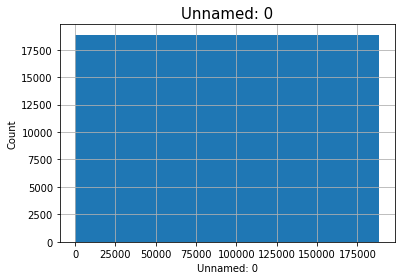

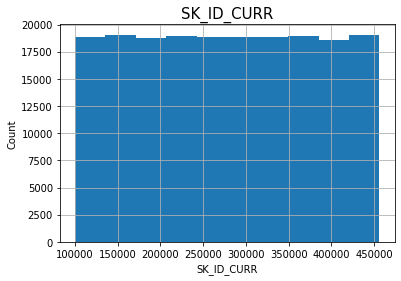

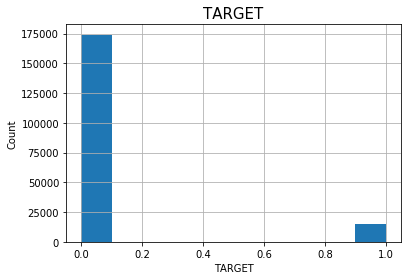

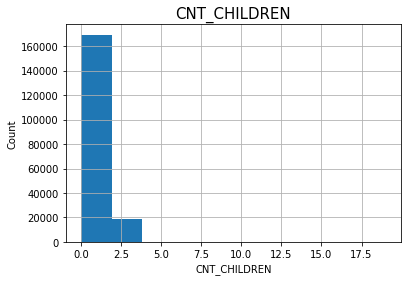

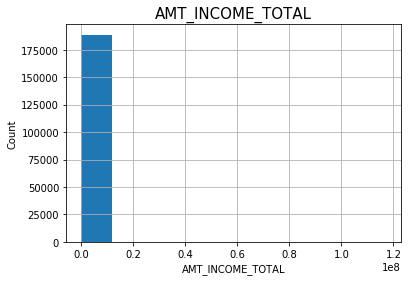

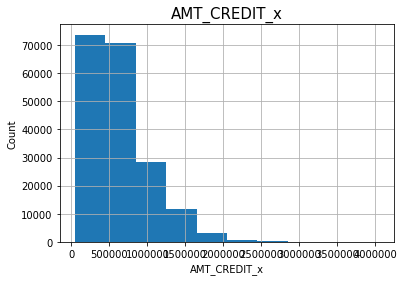

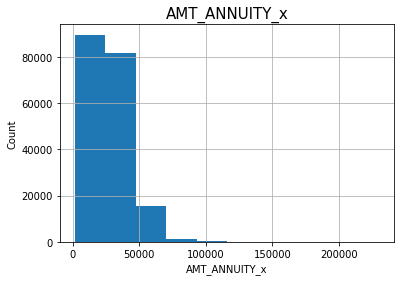

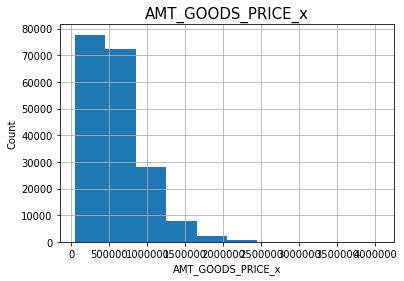

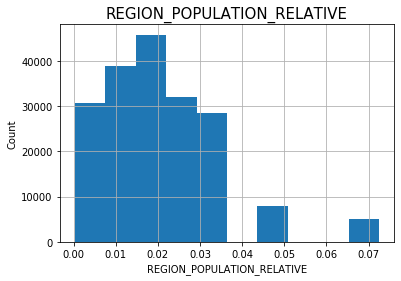

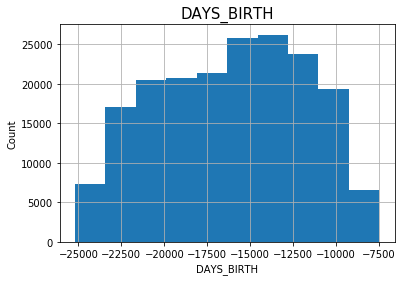

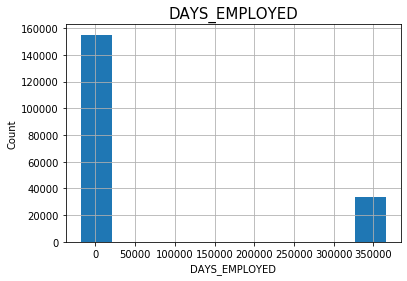

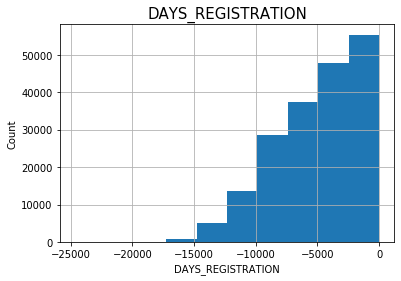

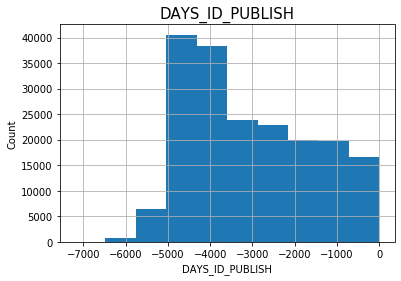

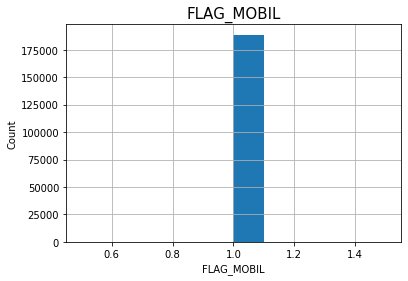

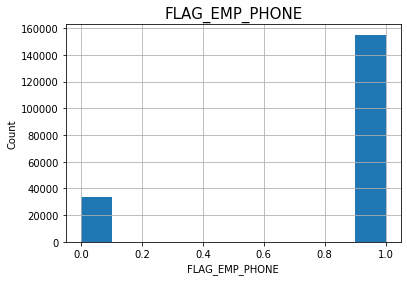

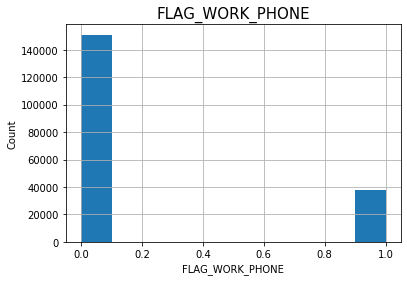

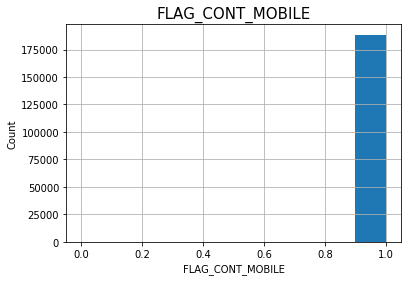

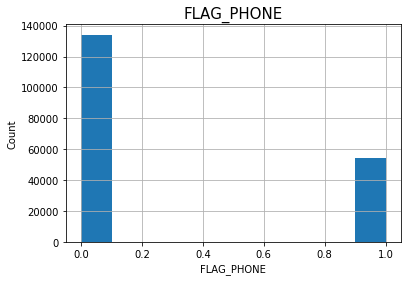

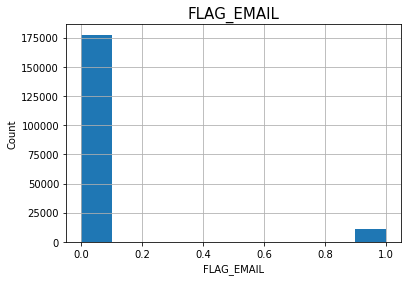

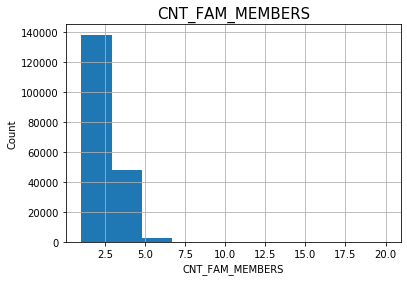

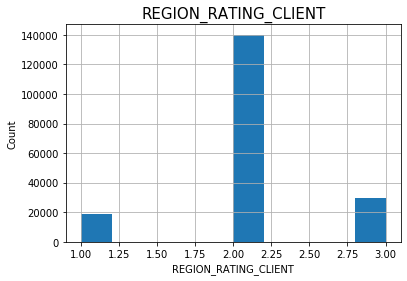

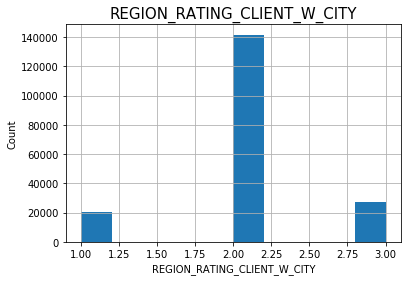

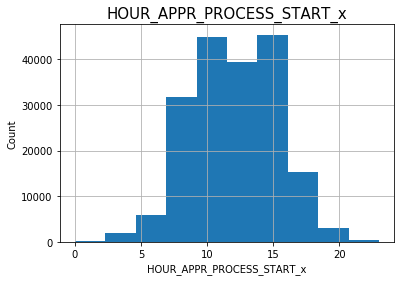

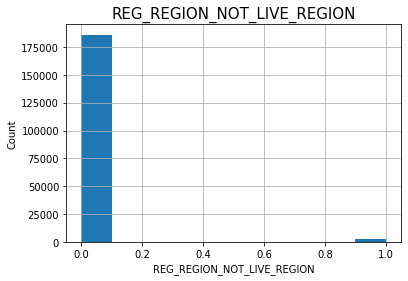

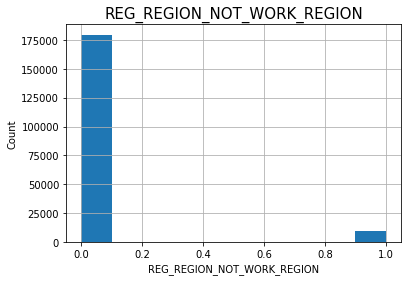

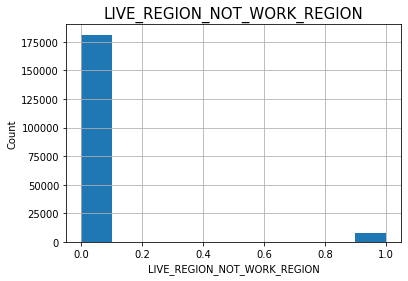

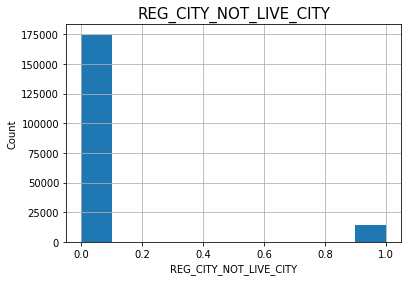

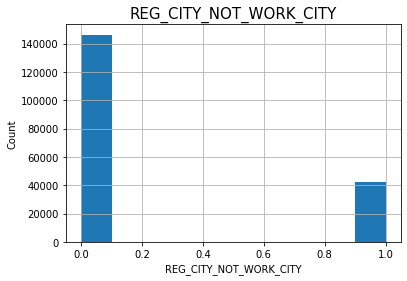

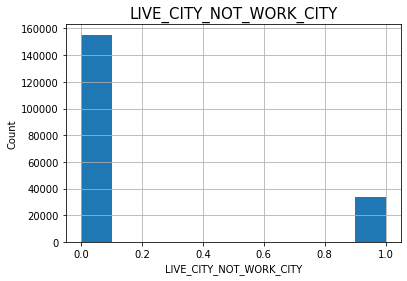

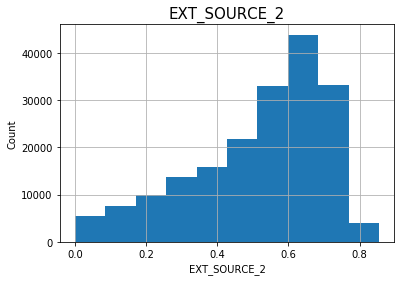

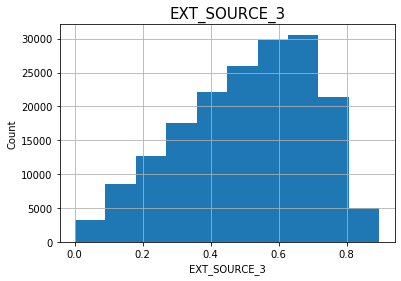

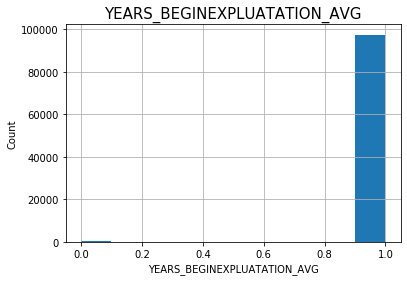

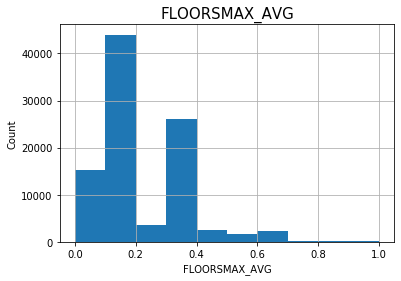

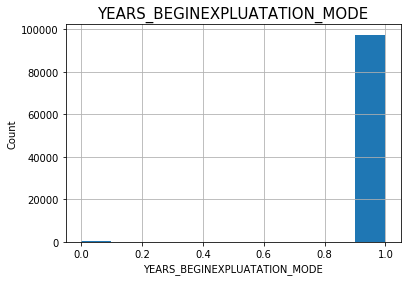

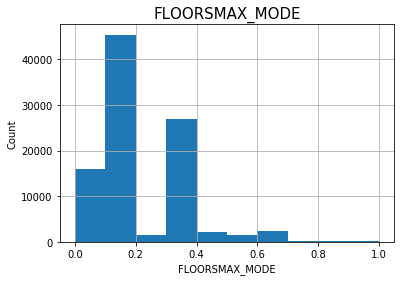

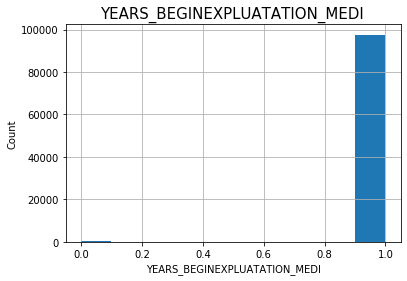

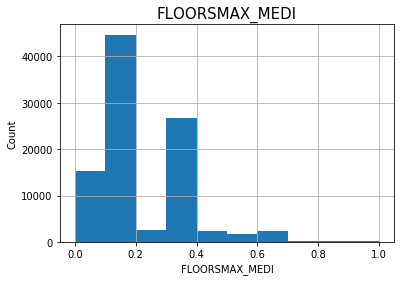

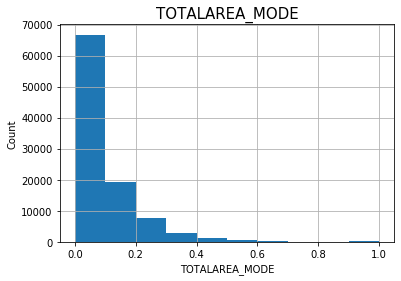

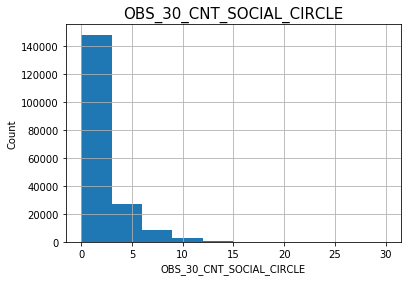

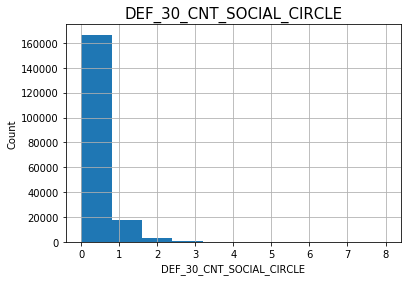

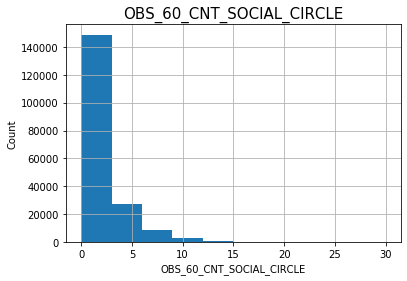

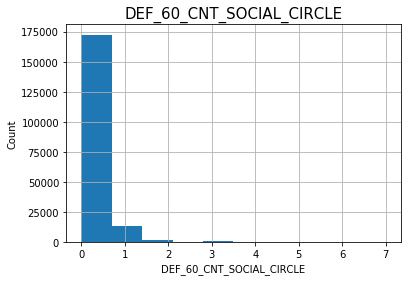

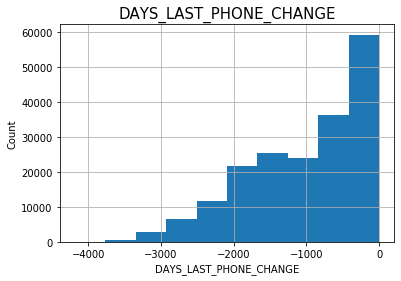

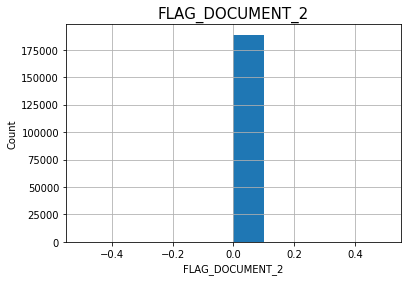

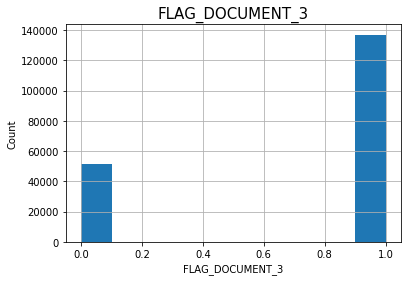

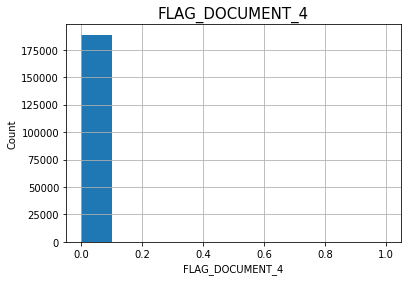

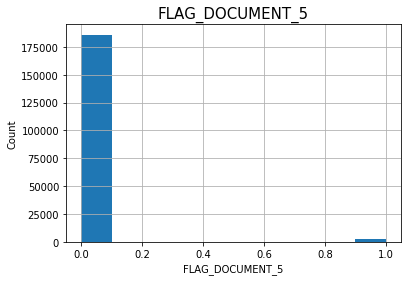

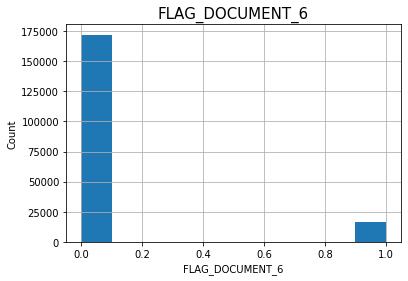

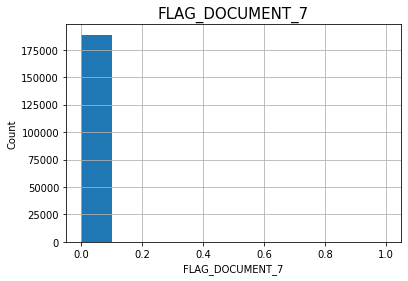

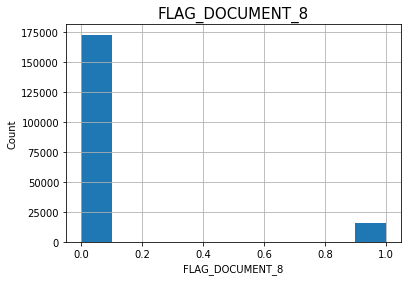

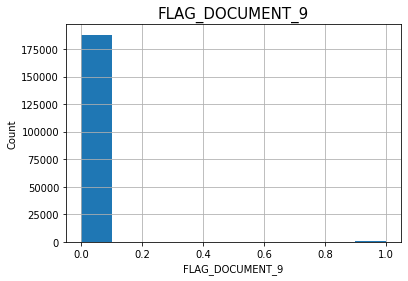

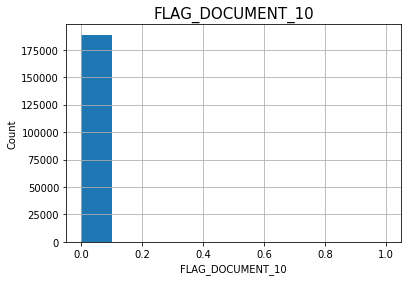

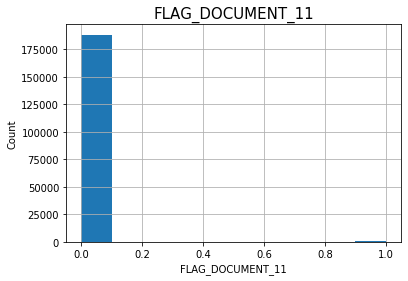

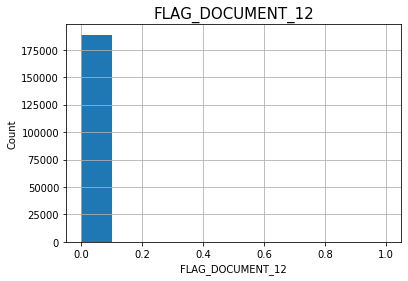

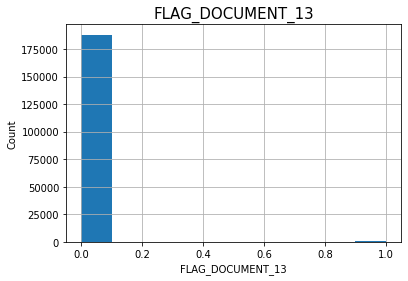

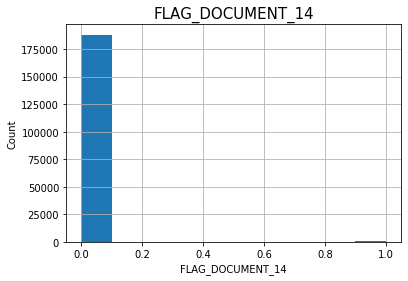

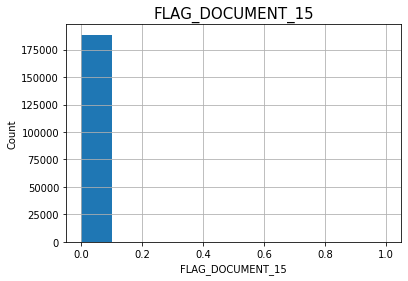

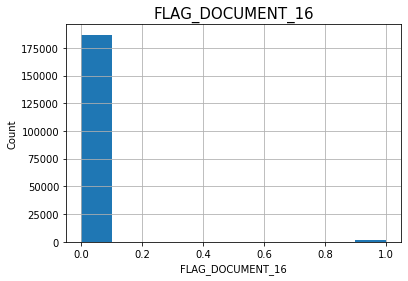

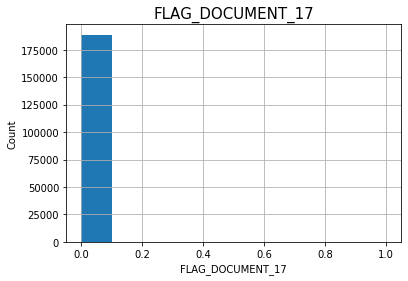

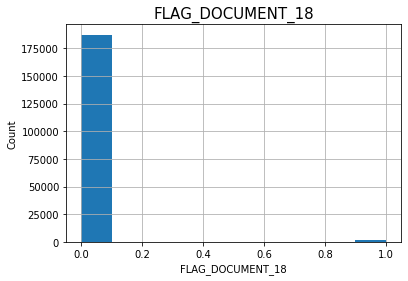

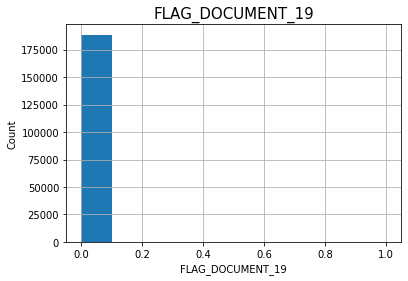

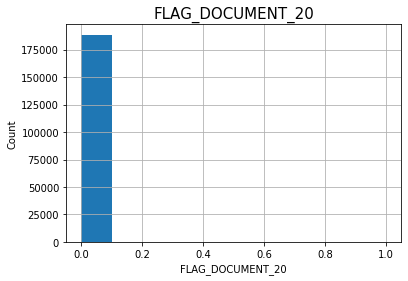

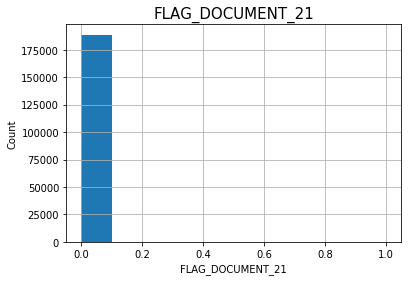

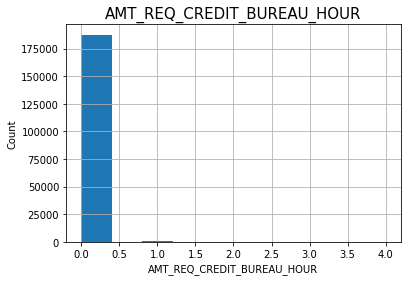

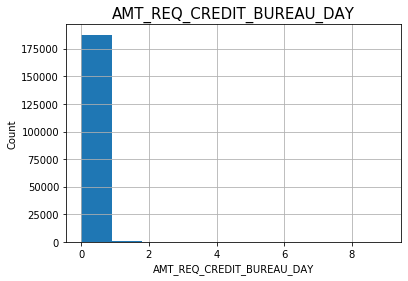

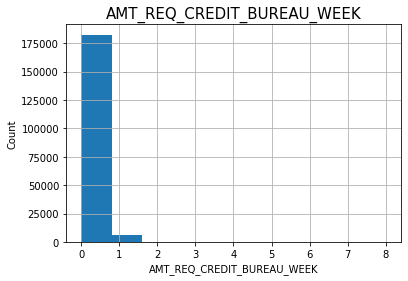

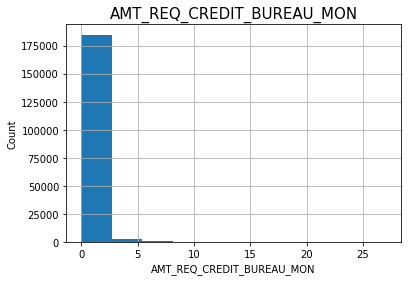

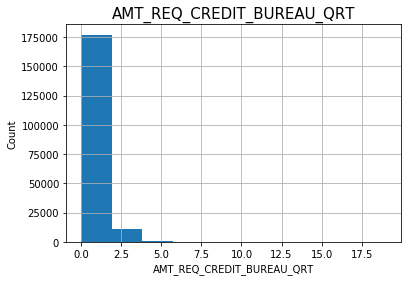

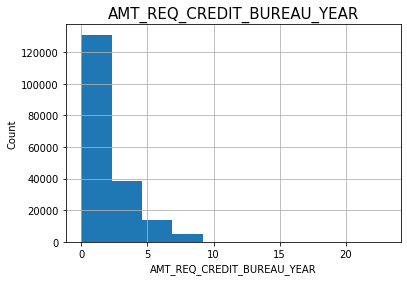

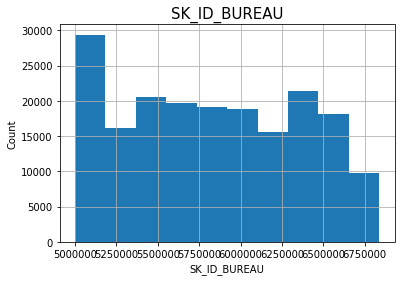

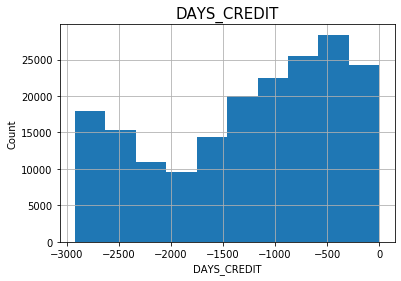

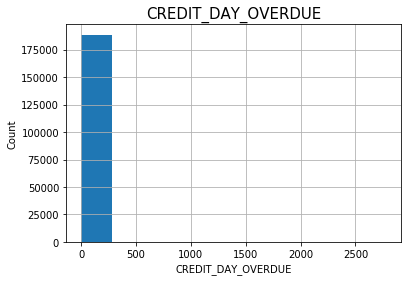

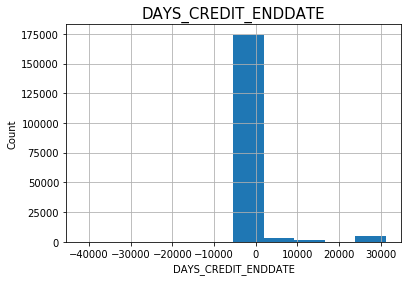

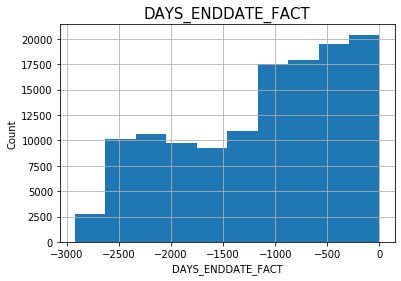

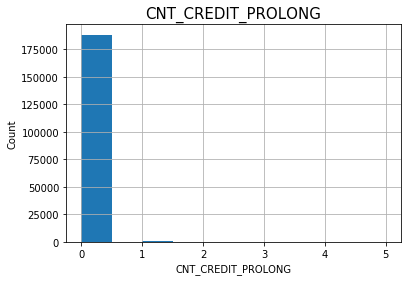

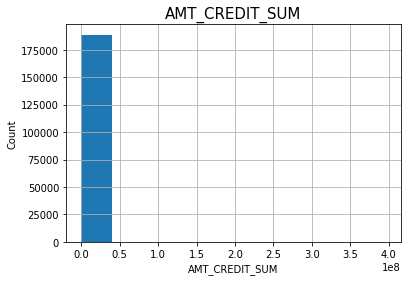

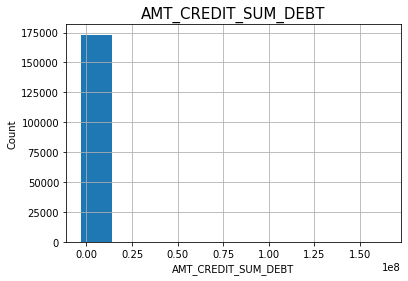

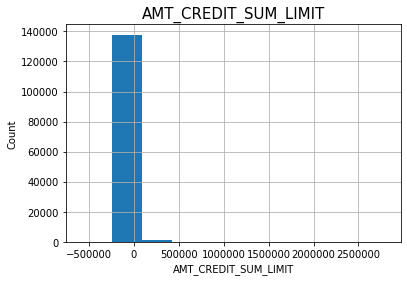

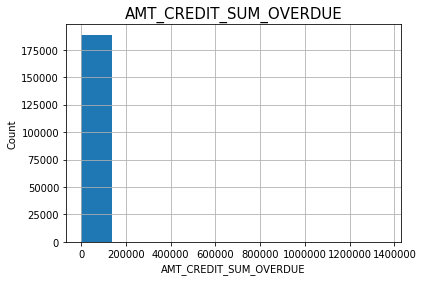

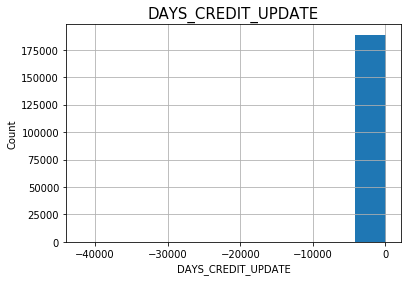

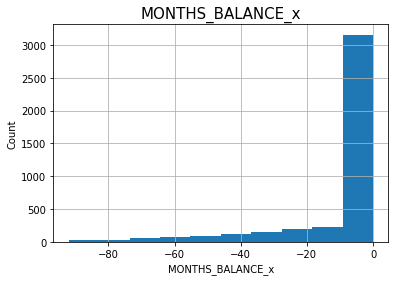

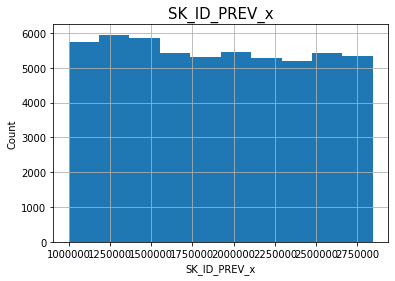

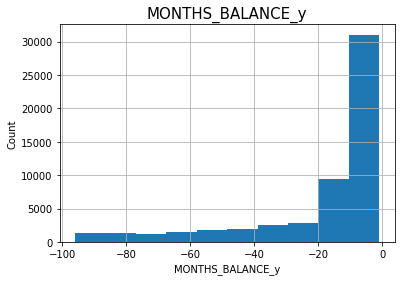

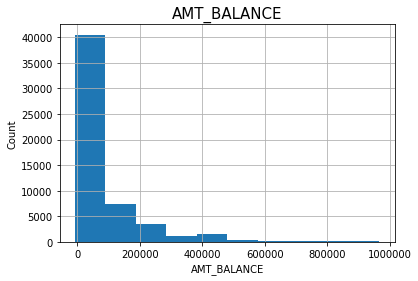

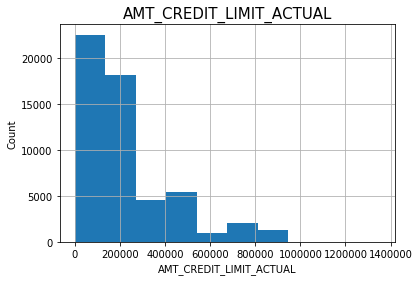

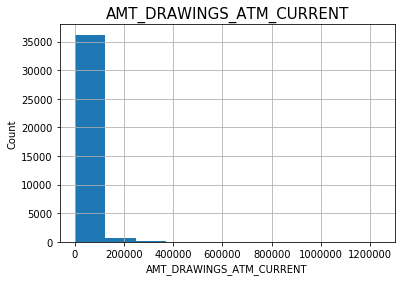

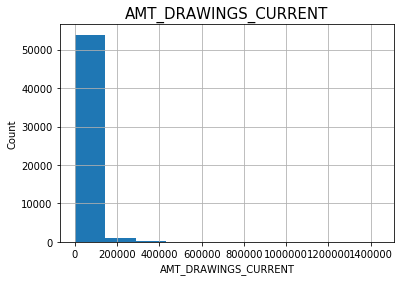

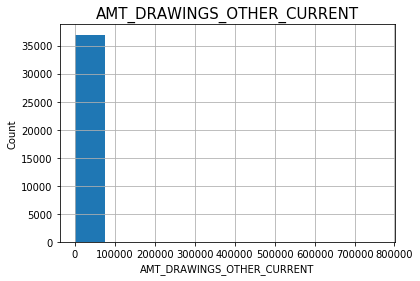

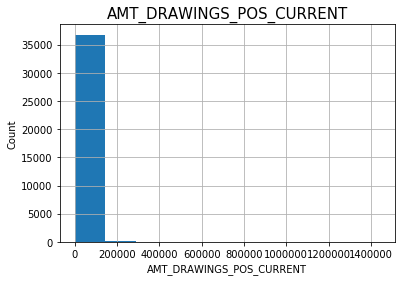

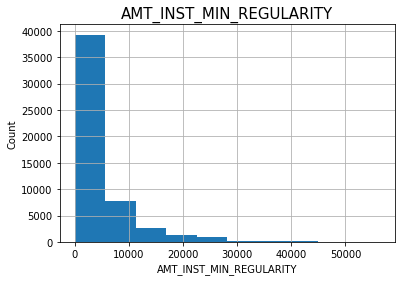

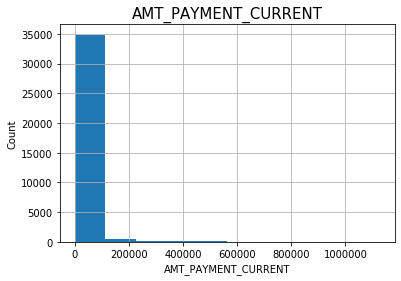

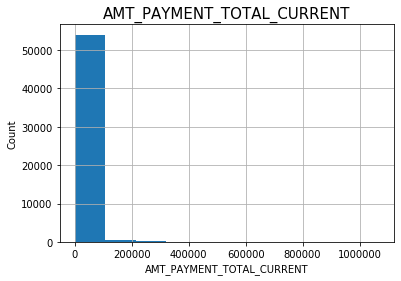

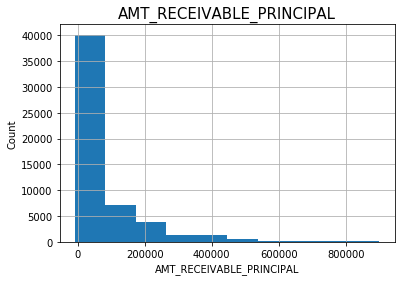

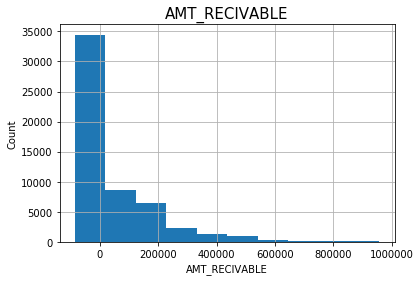

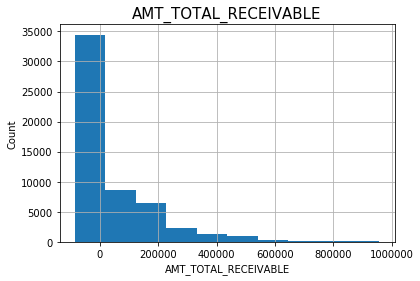

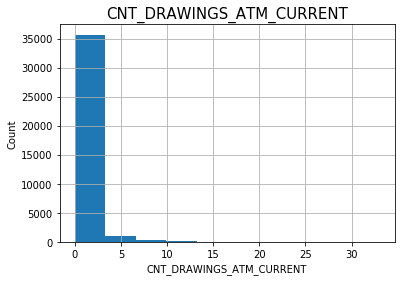

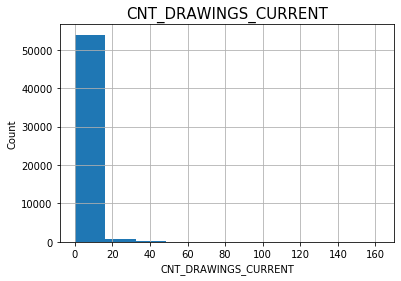

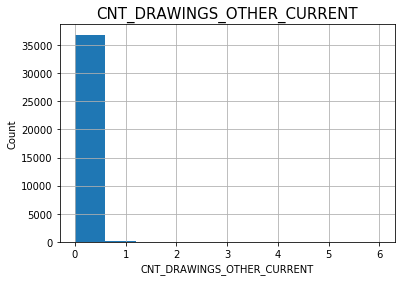

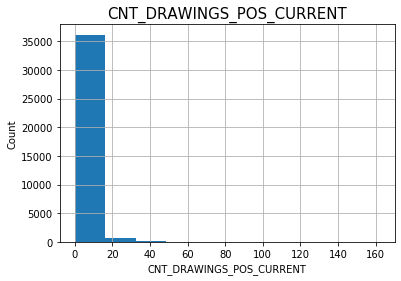

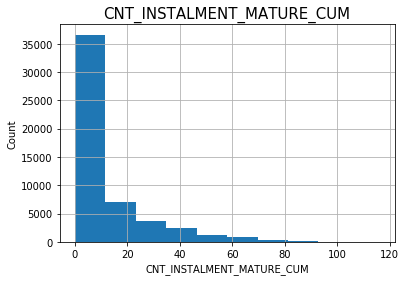

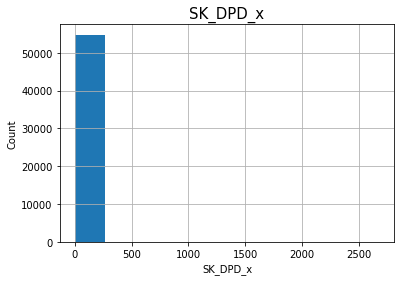

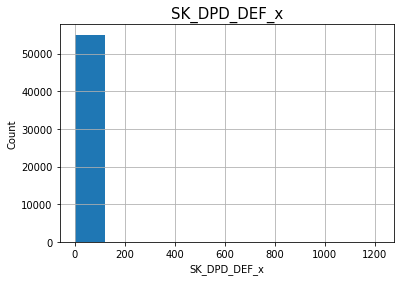

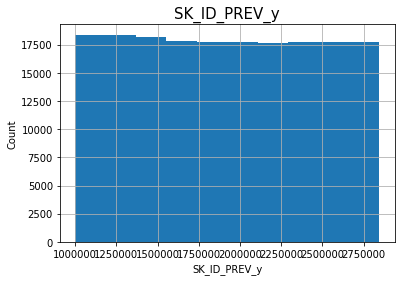

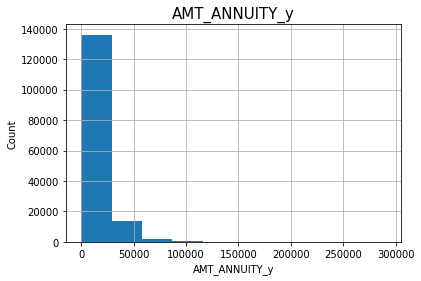

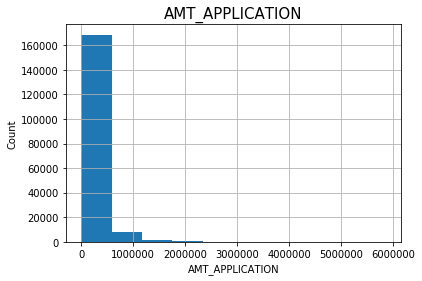

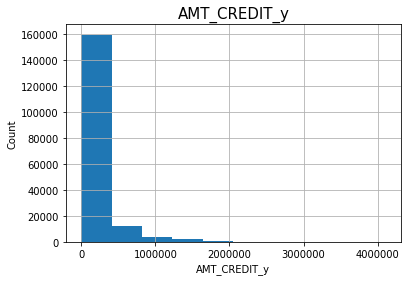

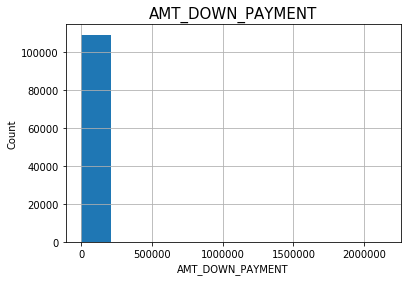

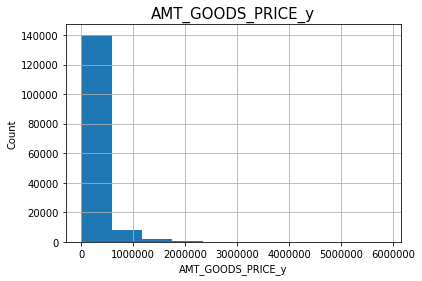

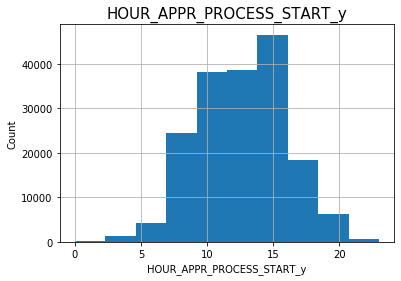

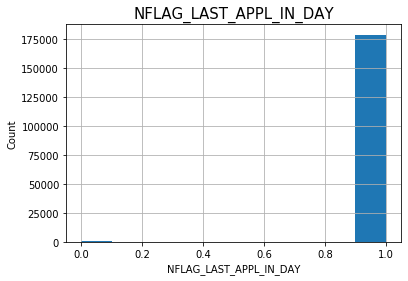

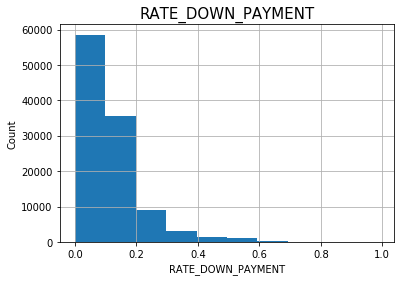

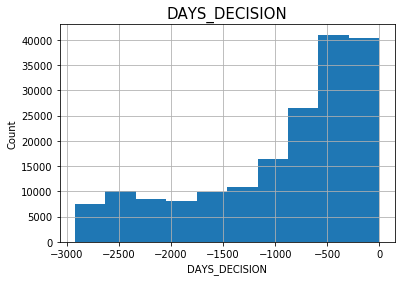

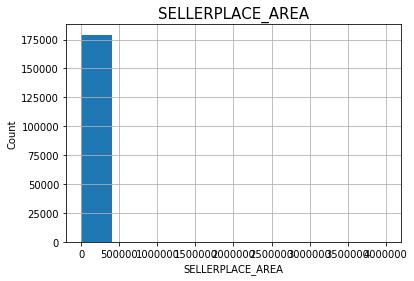

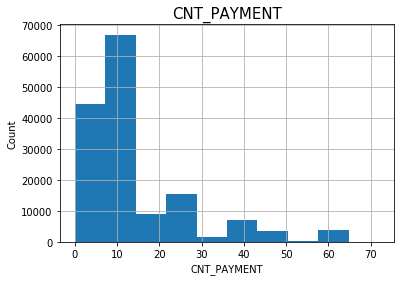

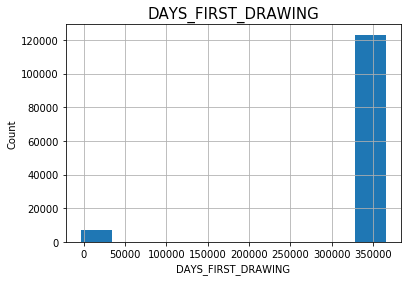

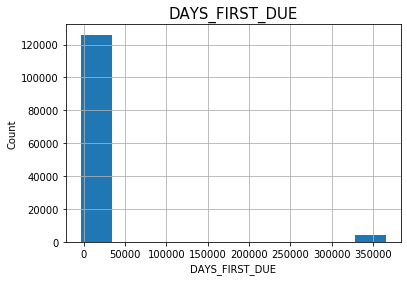

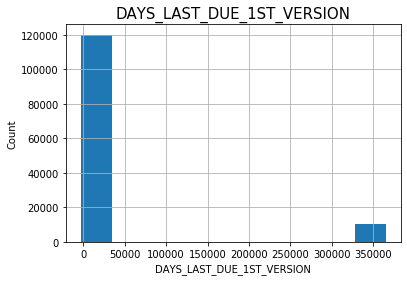

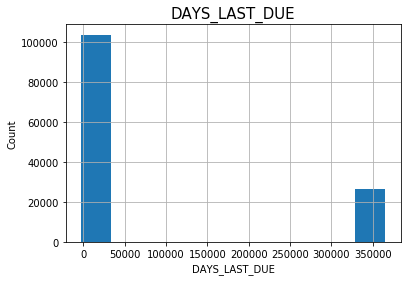

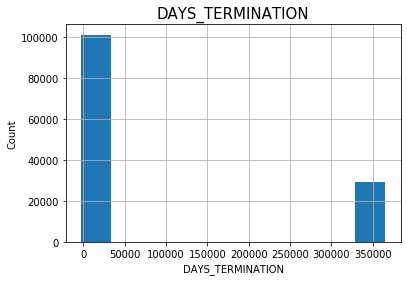

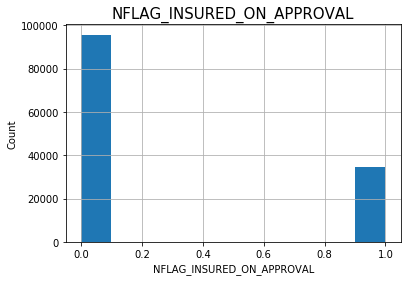

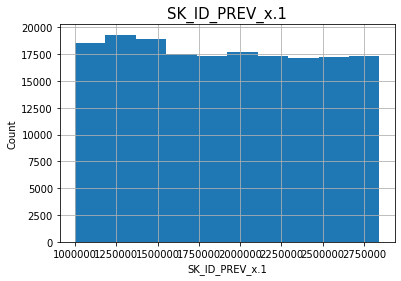

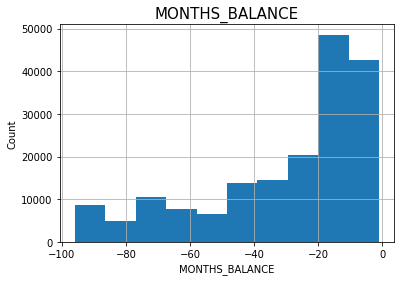

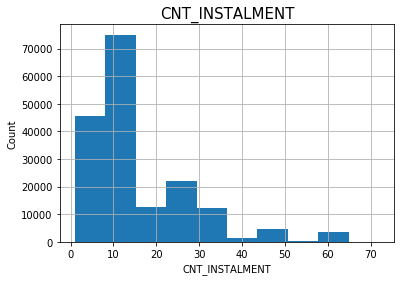

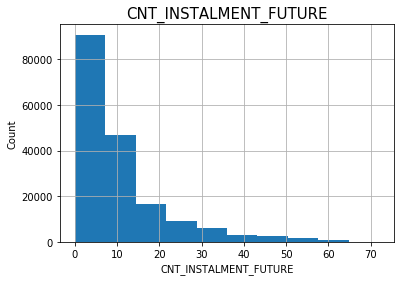

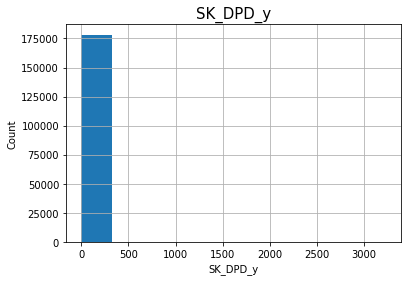

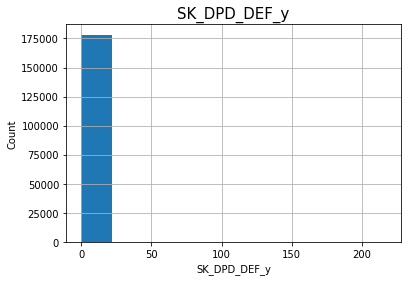

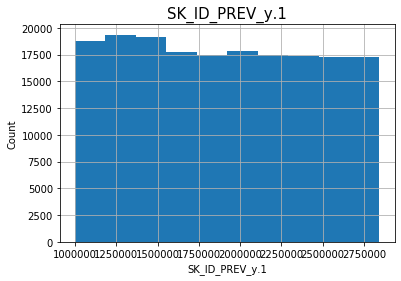

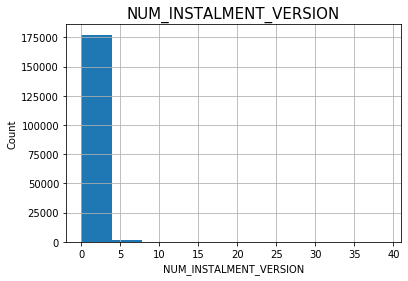

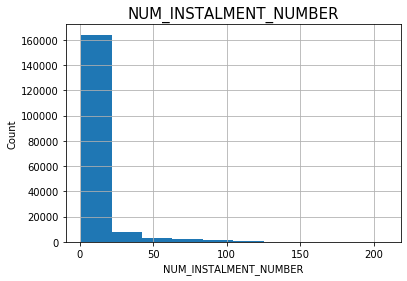

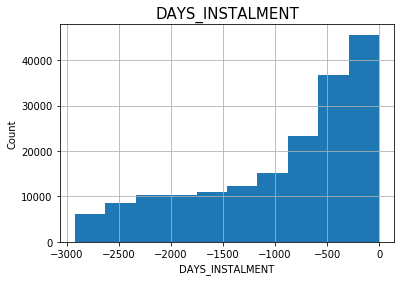

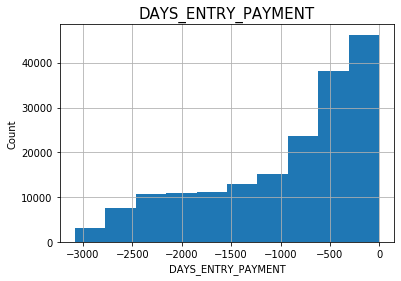

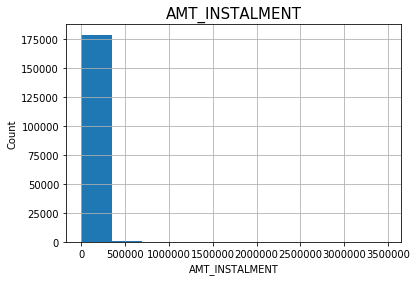

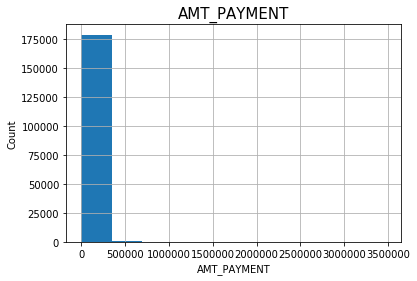

In [60]:
histogram(df2)

In [61]:
ex = df2.select_dtypes(exclude=['object'])

In [62]:
obj = df2.select_dtypes(include=['object'])

In [63]:
obj.shape

(188678, 35)

In [64]:
ex.shape

(188678, 133)

In [65]:
skew = pd.DataFrame(ex.skew(axis = 0, skipna = True)) 

In [66]:
skew.shape

(133, 1)

In [67]:
df2["MONTHS_BALANCE_x"].iloc[0]

nan

In [68]:
skew.shape

(133, 1)

### Measure of skewness if sk > 1 right skewness and if sk < -1 left skewness 

In [69]:
skew.iloc[0:50]

,0
Unnamed: 0,2.384650e-17
SK_ID_CURR,1.575423e-03
TARGET,3.158974e+00
CNT_CHILDREN,1.978542e+00
AMT_INCOME_TOTAL,3.561482e+02
AMT_CREDIT_x,1.197967e+00
AMT_ANNUITY_x,1.436599e+00
AMT_GOODS_PRICE_x,1.306878e+00
REGION_POPULATION_RELATIVE,1.496433e+00
DAYS_BIRTH,-1.162903e-01


In [70]:
skew.iloc[50:100]

,0
FLAG_DOCUMENT_9,16.349932
FLAG_DOCUMENT_10,217.180225
FLAG_DOCUMENT_11,18.000180
FLAG_DOCUMENT_12,434.370809
FLAG_DOCUMENT_13,15.777024
FLAG_DOCUMENT_14,17.472993
FLAG_DOCUMENT_15,27.308157
FLAG_DOCUMENT_16,9.640214
FLAG_DOCUMENT_17,58.019857
FLAG_DOCUMENT_18,10.755266


## Seperating Right and Left skewed Data

In [71]:
skew.rename(columns={0:'skew'}, inplace=True)

In [72]:
right = pd.DataFrame(skew[skew >= 1])

In [73]:
right = right.dropna()

In [74]:
right.head()

,skew
TARGET,3.158974
CNT_CHILDREN,1.978542
AMT_INCOME_TOTAL,356.148206
AMT_CREDIT_x,1.197967
AMT_ANNUITY_x,1.436599


In [75]:
left = pd.DataFrame(skew[skew < 1])
left = left.dropna()

In [76]:
right.shape

(95, 1)

In [77]:
left.shape

(38, 1)

In [78]:
right_sk = df2[list(right.index)]

In [79]:
left_sk = df2[list(left.index)]

In [80]:
print(obj.shape)
print(left_sk.shape)
print(right_sk.shape)

(188678, 35)
(188678, 38)
(188678, 95)


## so we divided our file in three parts left , right , and categorical file 

In [81]:
df2.shape

(188678, 168)

In [82]:
left_sk.describe()

,Unnamed: 0,SK_ID_CURR,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,CNT_FAM_MEMBERS,...,SK_ID_PREV_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,DAYS_FIRST_DRAWING,SK_ID_PREV_x.1,MONTHS_BALANCE,SK_ID_PREV_y.1,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT
count,188678.000000,188678.000000,188678.000000,188678.000000,188678.000000,188678.0,188678.000000,188678.000000,188678.000000,188677.000000,...,1.790990e+05,179099.000000,179099.000000,179099.000000,130256.000000,1.782020e+05,178202.000000,1.794910e+05,179491.000000,179488.000000
mean,94338.500000,278022.998357,-16135.624895,-4987.512217,-3061.312363,1.0,0.821892,0.998394,0.289302,2.165113,...,1.916146e+06,12.667318,0.997688,-949.903294,345280.274375,1.903085e+06,-30.268010,1.902035e+06,-942.861068,-954.063375
std,54466.791382,102874.228296,4282.582469,3521.835551,1485.685007,0.0,0.382604,0.040042,0.453440,0.908270,...,5.344718e+05,3.367272,0.048023,795.793626,83160.831083,5.352198e+05,25.701004,5.348444e+05,795.721419,794.876075
min,0.000000,100002.000000,-25201.000000,-24672.000000,-7197.000000,1.0,0.000000,0.000000,0.000000,1.000000,...,1.000032e+06,0.000000,0.000000,-2922.000000,-2920.000000,1.000011e+06,-96.000000,1.000011e+06,-2922.000000,-3082.000000
25%,47169.250000,188842.250000,-19713.000000,-7479.000000,-4324.000000,1.0,1.000000,1.000000,0.000000,2.000000,...,1.449806e+06,10.000000,1.000000,-1443.000000,365243.000000,1.434618e+06,-43.000000,1.434542e+06,-1497.000000,-1507.000000
50%,94338.500000,277924.500000,-15831.000000,-4518.000000,-3351.000000,1.0,1.000000,1.000000,0.000000,2.000000,...,1.913363e+06,13.000000,1.000000,-666.000000,365243.000000,1.896284e+06,-20.000000,1.895552e+06,-666.000000,-678.000000
75%,141507.750000,367002.750000,-12611.250000,-2003.000000,-1840.000000,1.0,1.000000,1.000000,1.000000,3.000000,...,2.380048e+06,15.000000,1.000000,-319.000000,365243.000000,2.366978e+06,-11.000000,2.366266e+06,-289.000000,-301.000000
max,188677.000000,456255.000000,-7489.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,20.000000,...,2.845377e+06,23.000000,1.000000,-2.000000,365243.000000,2.843486e+06,-1.000000,2.843493e+06,-2.000000,-2.000000


In [83]:
left_sk.quantile([.75])

,Unnamed: 0,SK_ID_CURR,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,CNT_FAM_MEMBERS,...,SK_ID_PREV_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,DAYS_FIRST_DRAWING,SK_ID_PREV_x.1,MONTHS_BALANCE,SK_ID_PREV_y.1,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT
0.75,141507.75,367002.75,-12611.25,-2003.0,-1840.0,1.0,1.0,1.0,1.0,3.0,...,2380048.5,15.0,1.0,-319.0,365243.0,2366978.25,-11.0,2366266.5,-289.0,-301.0


In [84]:
left_sk.quantile(.75).head()

Unnamed: 0           141507.75
SK_ID_CURR           367002.75
DAYS_BIRTH           -12611.25
DAYS_REGISTRATION     -2003.00
DAYS_ID_PUBLISH       -1840.00
Name: 0.75, dtype: float64

In [85]:
lf = left_sk.fillna(left_sk.quantile(.75))

In [86]:
lf.isnull().sum()

Unnamed: 0                      0
SK_ID_CURR                      0
DAYS_BIRTH                      0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
HOUR_APPR_PROCESS_START_x       0
EXT_SOURCE_2                    0
EXT_SOURCE_3                    0
YEARS_BEGINEXPLUATATION_AVG     0
YEARS_BEGINEXPLUATATION_MODE    0
YEARS_BEGINEXPLUATATION_MEDI    0
DAYS_LAST_PHONE_CHANGE          0
FLAG_DOCUMENT_2                 0
FLAG_DOCUMENT_3                 0
SK_ID_BUREAU                    0
DAYS_CREDIT                     0
DAYS_ENDDATE_FACT               0
DAYS_CREDIT_UPDATE              0
MONTHS_BALANCE_x                0
SK_ID_PREV_x                    0
MONTHS_BALANCE_y                0
SK_ID_PREV_y                    0
HOUR_APPR_PROC

In [87]:
rf = right_sk.fillna(right_sk.quantile(.25))

In [88]:
rf.isnull().sum()

TARGET                    0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
AMT_CREDIT_x              0
AMT_ANNUITY_x             0
                         ..
SK_DPD_DEF_y              0
NUM_INSTALMENT_VERSION    0
NUM_INSTALMENT_NUMBER     0
AMT_INSTALMENT            0
AMT_PAYMENT               0
Length: 95, dtype: int64

### Now Replacing Null values for Categorical Variable 

In [89]:
obj.isnull().sum()

NAME_CONTRACT_TYPE_x                 0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
NAME_TYPE_SUITE_x                  826
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
OCCUPATION_TYPE                  58852
WEEKDAY_APPR_PROCESS_START_x         0
ORGANIZATION_TYPE                    0
EMERGENCYSTATE_MODE              88230
CREDIT_ACTIVE                        0
CREDIT_CURRENCY                      0
CREDIT_TYPE                          0
STATUS                          184545
NAME_CONTRACT_STATUS_x          133709
NAME_CONTRACT_TYPE_y              9579
WEEKDAY_APPR_PROCESS_START_y      9579
FLAG_LAST_APPL_PER_CONTRACT       9579
NAME_CASH_LOAN_PURPOSE            9579
NAME_CONTRACT_STATUS_y            9579
NAME_PAYMENT_TYPE                 9579
CODE_REJECT_REASON                9579
NAME_TYPE_SUITE_y        

In [90]:
ob = obj.fillna(obj.mode().iloc[0])

In [91]:
ob.isnull().sum()

NAME_CONTRACT_TYPE_x            0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
NAME_TYPE_SUITE_x               0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
OCCUPATION_TYPE                 0
WEEKDAY_APPR_PROCESS_START_x    0
ORGANIZATION_TYPE               0
EMERGENCYSTATE_MODE             0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
CREDIT_TYPE                     0
STATUS                          0
NAME_CONTRACT_STATUS_x          0
NAME_CONTRACT_TYPE_y            0
WEEKDAY_APPR_PROCESS_START_y    0
FLAG_LAST_APPL_PER_CONTRACT     0
NAME_CASH_LOAN_PURPOSE          0
NAME_CONTRACT_STATUS_y          0
NAME_PAYMENT_TYPE               0
CODE_REJECT_REASON              0
NAME_TYPE_SUITE_y               0
NAME_CLIENT_TYPE                0
NAME_GOODS_CATEGORY             0
NAME_PORTFOLIO                  0
NAME_PRODUCT_T

## Now we don't have any null values in all the three files now we will mergre all the three files to make one single file 

In [92]:
final_frame = pd.concat([rf, lf], axis=1)

In [93]:
final_frame = pd.concat([final_frame, ob], axis=1)

In [94]:
final_frame.shape

(188678, 168)

In [95]:
final_frame.isnull().sum()

TARGET                  0
CNT_CHILDREN            0
AMT_INCOME_TOTAL        0
AMT_CREDIT_x            0
AMT_ANNUITY_x           0
                       ..
CHANNEL_TYPE            0
NAME_SELLER_INDUSTRY    0
NAME_YIELD_GROUP        0
PRODUCT_COMBINATION     0
NAME_CONTRACT_STATUS    0
Length: 168, dtype: int64

In [96]:
final_frame.to_csv('AIF_Final_File_new.csv',index=True)

In [98]:
pwd

'C:\\Users\\Shreyansh\\AIF_Assignments'

In [97]:
final_frame = pd.read_csv("AIF_Final_File.csv_new")

FileNotFoundError: [Errno 2] File AIF_Final_File.csv_new does not exist: 'AIF_Final_File.csv_new'

In [5]:
final_frame.describe()

,Unnamed: 0,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,FLAG_WORK_PHONE,...,SK_ID_PREV_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,DAYS_FIRST_DRAWING,SK_ID_PREV_x.1,MONTHS_BALANCE,SK_ID_PREV_y.1,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT
count,263491.000000,263491.000000,263491.000000,2.634910e+05,2.634910e+05,263491.000000,2.634910e+05,263491.000000,263491.000000,263491.000000,...,2.634910e+05,263491.000000,263491.000000,263491.000000,263491.000000,2.634910e+05,263491.000000,2.634910e+05,263491.000000,263491.000000
mean,131745.000000,0.077301,0.423510,1.714017e+05,6.064026e+05,27171.528046,5.452551e+05,0.020800,63156.411308,0.198170,...,1.889979e+06,12.537430,0.997723,-967.061118,351657.872899,1.875847e+06,-30.619459,1.877686e+06,-959.218068,-970.437226
std,76063.444227,0.267068,0.726214,2.493826e+05,4.047055e+05,14380.751034,3.712317e+05,0.013718,140796.127344,0.398622,...,5.301696e+05,3.321451,0.047665,778.793874,69230.436363,5.304267e+05,24.971498,5.312782e+05,780.976354,780.122563
min,0.000000,0.000000,0.000000,2.610000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-17912.000000,0.000000,...,1.000005e+06,0.000000,0.000000,-2922.000000,-2920.000000,1.000005e+06,-96.000000,1.000005e+06,-2922.000000,-3082.000000
25%,65872.500000,0.000000,0.000000,1.125000e+05,2.725200e+05,16623.000000,2.385000e+05,0.010006,-2849.000000,0.000000,...,1.448877e+06,10.000000,1.000000,-1423.000000,365243.000000,1.435382e+06,-42.000000,1.434214e+06,-1473.000000,-1484.000000
50%,131745.000000,0.000000,0.000000,1.575000e+05,5.212800e+05,24970.500000,4.500000e+05,0.018850,-1267.000000,0.000000,...,1.860727e+06,12.000000,1.000000,-709.000000,365243.000000,1.839518e+06,-21.000000,1.844708e+06,-707.000000,-720.000000
75%,197617.500000,0.000000,1.000000,2.025000e+05,8.131950e+05,34740.000000,6.885000e+05,0.028663,-306.000000,0.000000,...,2.350198e+06,15.000000,1.000000,-330.000000,365243.000000,2.334526e+06,-11.000000,2.339754e+06,-300.000000,-312.000000
max,263490.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,365243.000000,1.000000,...,2.845378e+06,23.000000,1.000000,-2.000000,365243.000000,2.843492e+06,-1.000000,2.843493e+06,-2.000000,-2.000000


In [125]:
list(final_frame.columns)

['TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'AMT_ANNUITY_x',
 'AMT_GOODS_PRICE_x',
 'REGION_POPULATION_RELATIVE',
 'DAYS_EMPLOYED',
 'FLAG_WORK_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_

In [130]:
final_frame.shape

(263491, 168)

In [131]:
final_frame.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_EMAIL,...,SK_ID_PREV_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,DAYS_FIRST_DRAWING,SK_ID_PREV_x.1,MONTHS_BALANCE,SK_ID_PREV_y.1,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT
count,263491.000000,263491.000000,2.634910e+05,2.634910e+05,263491.000000,2.634910e+05,263491.000000,263491.000000,263491.000000,263491.000000,...,2.634910e+05,263491.000000,263491.000000,263491.000000,263491.000000,2.634910e+05,263491.000000,2.634910e+05,263491.000000,263491.000000
mean,0.077301,0.423510,1.714017e+05,6.064026e+05,27171.528046,5.452551e+05,0.020800,63156.411308,0.198170,0.057922,...,1.889979e+06,12.537430,0.997723,-967.061118,351657.872899,1.875847e+06,-30.619459,1.877686e+06,-959.218068,-970.437226
std,0.267068,0.726214,2.493826e+05,4.047055e+05,14380.751034,3.712317e+05,0.013718,140796.127344,0.398622,0.233597,...,5.301696e+05,3.321451,0.047665,778.793874,69230.436363,5.304267e+05,24.971498,5.312782e+05,780.976354,780.122563
min,0.000000,0.000000,2.610000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-17912.000000,0.000000,0.000000,...,1.000005e+06,0.000000,0.000000,-2922.000000,-2920.000000,1.000005e+06,-96.000000,1.000005e+06,-2922.000000,-3082.000000
25%,0.000000,0.000000,1.125000e+05,2.725200e+05,16623.000000,2.385000e+05,0.010006,-2849.000000,0.000000,0.000000,...,1.448877e+06,10.000000,1.000000,-1423.000000,365243.000000,1.435382e+06,-42.000000,1.434214e+06,-1473.000000,-1484.000000
50%,0.000000,0.000000,1.575000e+05,5.212800e+05,24970.500000,4.500000e+05,0.018850,-1267.000000,0.000000,0.000000,...,1.860727e+06,12.000000,1.000000,-709.000000,365243.000000,1.839518e+06,-21.000000,1.844708e+06,-707.000000,-720.000000
75%,0.000000,1.000000,2.025000e+05,8.131950e+05,34740.000000,6.885000e+05,0.028663,-306.000000,0.000000,0.000000,...,2.350198e+06,15.000000,1.000000,-330.000000,365243.000000,2.334526e+06,-11.000000,2.339754e+06,-300.000000,-312.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,365243.000000,1.000000,1.000000,...,2.845378e+06,23.000000,1.000000,-2.000000,365243.000000,2.843492e+06,-1.000000,2.843493e+06,-2.000000,-2.000000


### Feature Selection 

In [9]:
!pip install monotonic-binning==0.0.1

In [13]:
!pip install xverse==1.0.5

## Calculating IV of all variables 

In [10]:
from monotonic_binning import monotonic_woe_binning as bin

In [14]:
from xverse.transformer import MonotonicBinning


In [ ]:
## Setting target and predictor 

In [15]:
X=final_frame.iloc[:,2:]
y=final_frame.iloc[:,1]

In [16]:
clf = MonotonicBinning()
clf.fit(X, y)

print(clf.bins)
output_bins = clf.bins

{'CNT_CHILDREN': array([ 0.,  1., 19.]), 'AMT_INCOME_TOTAL': array([2.610e+04, 1.215e+05, 1.800e+05, 1.170e+08]), 'AMT_CREDIT_x': array([  45000.,  341280.,  695970., 4050000.]), 'AMT_ANNUITY_x': array([  1615.5,  19737. ,  30865.5, 258025.5]), 'AMT_GOODS_PRICE_x': array([  40500.,  306000.,  675000., 4050000.]), 'REGION_POPULATION_RELATIVE': array([0.00029 , 0.011703, 0.025164, 0.072508]), 'DAYS_EMPLOYED': array([-17912.,  -2210.,   -604., 365243.]), 'FLAG_WORK_PHONE': array([0., 1.]), 'FLAG_EMAIL': array([0., 1.]), 'REG_REGION_NOT_LIVE_REGION': array([0., 1.]), 'REG_REGION_NOT_WORK_REGION': array([0., 1.]), 'LIVE_REGION_NOT_WORK_REGION': array([0., 1.]), 'REG_CITY_NOT_LIVE_CITY': array([0., 1.]), 'REG_CITY_NOT_WORK_CITY': array([0., 1.]), 'LIVE_CITY_NOT_WORK_CITY': array([0., 1.]), 'FLOORSMAX_AVG': array([0.    , 0.325 , 0.3333, 1.    ]), 'FLOORSMAX_MODE': array([0.    , 0.3333, 1.    ]), 'FLOORSMAX_MEDI': array([0.    , 0.3333, 1.    ]), 'TOTALAREA_MODE': array([0.    , 0.0912, 0.12

In [17]:
clf = MonotonicBinning(custom_binning=output_bins) #output_bins was created earlier

out_X = clf.transform(X)
out_X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLOORSMAX_AVG,FLOORSMAX_MODE,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,...,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,SK_ID_BUREAU,DAYS_CREDIT,DAYS_ENDDATE_FACT,DAYS_CREDIT_UPDATE,MONTHS_BALANCE_x,SK_ID_PREV_x,MONTHS_BALANCE_y,SK_ID_PREV_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,DAYS_FIRST_DRAWING,SK_ID_PREV_x.1,MONTHS_BALANCE,SK_ID_PREV_y.1,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_x,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE,STATUS,NAME_CONTRACT_STATUS_x,NAME_CONTRACT_TYPE_y,WEEKDAY_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_y,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NAME_CONTRACT_STATUS
0,"(-0.001, 1.0]","(180000.0, 117000000.0]","(341280.0, 695970.0]","(19737.0, 30865.5]","(306000.0, 675000.0]","(0.0117, 0.0252]","(-2210.0, -604.0]",0,0,0,0,0,0,0,0,"(-0.001, 0.325]","(-0.001, 0.333]","(-0.001, 0.333]","(-0.001, 0.0912]","(1.0, 348.0]","(1.0, 34.0]","(1.0, 344.0]","(1.0, 24.0]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,"(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-41877.001, -944.0]","(-0.001, 1.0]","(-0.001, 63094.5]","(-2796723.7210000004, 0.0]","(-586406.116, 0.0]","(-0.001, 1.0]","(-16692.436, 94742.325]","(-0.001, 270000.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 5625.0]","(-0.001, 13500.0]","(-0.001, 6750.0]","(-20873.071, 89917.74]","(-85377.376, 93694.545]",...,1,"(0.999, 2.0]",2,2,"(-0.001, 11.0]","(-0.00099868, 0.471]","(-0.000473, 0.394]","(-0.001, 0.977]","(-0.001, 0.977]","(-0.001, 0.977]","(-1351.0, -445.0]",0,1,"(5559757.0, 6193979.0]","(-1531.0, -686.0]","(-1783.0, -947.0]","(-41919.001, -759.0]","(-94.001, -10.0]","(1000017.999, 1431449.0]","(-96.001, -22.0]","(1000004.999, 1534887.0]","(-0.001, 11.0]",1.0,"(-1197.0, -430.0]","(1.0, 365243.0]","(1000004.999, 1509228.0]","(-14.0, -1.0]","(1000004.999, 1515986.0]","(-412.0, -2.0]","(-424.0, -2.0]",Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,No,Closed,currency 1,Credit card,C,Active,Consumer loans,SATURDA

In [18]:
from xverse.transformer import WOE
clf = WOE()
clf.fit(X, y)
clf.woe_df # weight of evidence transformation dataset. This dataset will be used in making bivariate charts as well. 
clf.iv_df #information value dataset

,Variable_Name,Information_Value
72,EXT_SOURCE_3,2.884167e-01
71,EXT_SOURCE_2,2.315563e-01
51,DAYS_BIRTH,7.434848e-02
138,ORGANIZATION_TYPE,7.319419e-02
123,NAME_INCOME_TYPE,5.609472e-02
...,...,...
74,FLAG_DOCUMENT_10,8.289918e-10
89,FLAG_DOCUMENT_5,4.295224e-10
76,FLAG_DOCUMENT_12,6.767210e-11
97,FLAG_MOBIL,0.000000e+00


In [19]:
clf.woe_df

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,AMT_ANNUITY_x,"(1615.499, 19737.0]",87945,6372,81573,0.072454,0.927546,0.312844,0.335522,-0.069982,0.007148
1,AMT_ANNUITY_x,"(19737.0, 30865.5]",87732,7537,80195,0.085909,0.914091,0.370041,0.329854,0.114966,0.007148
2,AMT_ANNUITY_x,"(30865.5, 258025.5]",87814,6459,81355,0.073553,0.926447,0.317115,0.334625,-0.053745,0.007148
3,AMT_ANNUITY_y,"(-0.001, 8446.41]",87831,7300,80531,0.083114,0.916886,0.358405,0.331236,0.078835,0.004669
4,AMT_ANNUITY_y,"(8446.41, 17338.365]",122557,9372,113185,0.076471,0.923529,0.460134,0.465546,-0.011695,0.004669
...,...,...,...,...,...,...,...,...,...,...,...
622,YEARS_BEGINEXPLUATATION_MEDI,"(0.977, 0.979]",15731,1103,14628,0.070116,0.929884,0.054154,0.060167,-0.105301,0.022499
623,YEARS_BEGINEXPLUATATION_MEDI,"(0.979, 1.0]",85458,5391,80067,0.063084,0.936916,0.264680,0.329327,-0.218530,0.022499
624,YEARS_BEGINEXPLUATATION_MODE,"(-0.001, 0.977]",163691,13975,149716,0.085374,0.914626,0.686125,0.615804,0.108132,0.022017
625,YEARS_BEGINEXPLUATATION_MODE,"(0.977, 0.979]",12572,853,11719,0.067849,0.932151,0.041879,0.048202,-0.140605,0.022017


In [94]:
mno = clf.iv_df[clf.iv_df['Information_Value']>0.03]
mno

,Variable_Name,Information_Value
72,EXT_SOURCE_3,0.288417
71,EXT_SOURCE_2,0.231556
51,DAYS_BIRTH,0.074348
138,ORGANIZATION_TYPE,0.073194
123,NAME_INCOME_TYPE,0.056095
52,DAYS_CREDIT,0.054484
16,AMT_GOODS_PRICE_x,0.049742
137,OCCUPATION_TYPE,0.048623
143,REGION_RATING_CLIENT_W_CITY,0.047945
139,PRODUCT_COMBINATION,0.047483


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [23]:
final_frame.head()

,Unnamed: 0,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLOORSMAX_AVG,FLOORSMAX_MODE,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,...,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,SK_ID_BUREAU,DAYS_CREDIT,DAYS_ENDDATE_FACT,DAYS_CREDIT_UPDATE,MONTHS_BALANCE_x,SK_ID_PREV_x,MONTHS_BALANCE_y,SK_ID_PREV_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,DAYS_FIRST_DRAWING,SK_ID_PREV_x.1,MONTHS_BALANCE,SK_ID_PREV_y.1,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_x,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE,STATUS,NAME_CONTRACT_STATUS_x,NAME_CONTRACT_TYPE_y,WEEKDAY_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_y,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NAME_CONTRACT_STATUS
0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-637,0,0,0,0,0,0,0,0,0.0833,0.0833,0.0833,0.0149,2.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,-1038.0,0,40761.0,0.0,0.0,0.0,94742.325,270000.0,0.0,0.0,0.0,0.0,5625.0,13500.0,6750.0,...,1,1.0,2,2,10,0.262949,0.139376,0.9722,0.9722,0.9722,-1134.0,0,1,6158904,-1125,-1038.0,-1038,-15.0,1431449.0,-22.0,1038818.0,9.0,1.0,-606.0,365243.0,1038818.0,-13.0,1038818.0,-115.0,-133.0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,No,Closed,currency 1,Credit card,C,Active,Consumer loans,SATURDAY,Y,XAP,Approved,XNA,XAP,Unaccompanied,New,Vehicles,POS,XNA,Stone,Auto technology,low_normal,POS other with interest,Active
1,1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1188,0,0,0,0,0,0,0,0,0.2917,0.2917,0.2917,0.0714,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,-2434.0,0,22248.0,0.0,0.0,0.0,94742.325,270000.0,0.0,0.0,0.0,0.0,5625.0,13500.0,6750.0,...,1,2.0,1,1,11,0.622246,0.370650,0.9851,0.9851,0.9851,-828.0,0,1,5885877,-2586,-2131.0,-2131,-10.0,1431449.0,-22.0,1810518.0,12.0,1.0,-746.0,365243.0,2396755.0,-66.0,1810518.0,-686.0,-690.0,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,No,Closed,currency 1,Consumer credit,C,Active,Cash loans,FRIDAY,Y,XNA,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,low

In [26]:
list(mno["Variable_Name"])

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_BIRTH',
 'ORGANIZATION_TYPE',
 'NAME_INCOME_TYPE',
 'DAYS_CREDIT',
 'AMT_GOODS_PRICE_x',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT_W_CITY',
 'PRODUCT_COMBINATION',
 'NAME_EDUCATION_TYPE',
 'REGION_RATING_CLIENT',
 'DAYS_EMPLOYED',
 'DAYS_CREDIT_UPDATE',
 'DAYS_LAST_PHONE_CHANGE',
 'CODE_GENDER',
 'AMT_CREDIT_SUM_DEBT',
 'DAYS_ID_PUBLISH',
 'DAYS_CREDIT_ENDDATE',
 'FLAG_EMP_PHONE',
 'REG_CITY_NOT_WORK_CITY',
 'NAME_YIELD_GROUP',
 'AMT_CREDIT_x']

In [27]:
df_new= final_frame[list(mno["Variable_Name"])]

In [28]:
df_new.head()

,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_BIRTH,ORGANIZATION_TYPE,NAME_INCOME_TYPE,DAYS_CREDIT,AMT_GOODS_PRICE_x,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,PRODUCT_COMBINATION,NAME_EDUCATION_TYPE,REGION_RATING_CLIENT,DAYS_EMPLOYED,DAYS_CREDIT_UPDATE,DAYS_LAST_PHONE_CHANGE,CODE_GENDER,AMT_CREDIT_SUM_DEBT,DAYS_ID_PUBLISH,DAYS_CREDIT_ENDDATE,FLAG_EMP_PHONE,REG_CITY_NOT_WORK_CITY,NAME_YIELD_GROUP,AMT_CREDIT_x
0,0.139376,0.262949,-9461,Business Entity Type 3,Working,-1125,351000.0,Laborers,2,POS other with interest,Secondary / secondary special,2,-637,-1038,-1134.0,M,0.0,-2120,-1038.0,1,0,low_normal,406597.5
1,0.370650,0.622246,-16765,School,State servant,-2586,1129500.0,Core staff,1,Cash X-Sell: low,Higher education,1,-1188,-2131,-828.0,F,0.0,-291,-2434.0,1,0,low_normal,1293502.5
2,0.729567,0.555912,-19046,Government,Working,-1326,135000.0,Laborers,2,POS mobile without interest,Secondary / secondary special,2,-225,-682,-815.0,M,0.0,-2531,-595.0,1,0,middle,135000.0
3,0.370650,0.322738,-19932,Religion,Working,-1149,513000.0,Core staff,2,Cash Street: high,Secondary / secondary special,2,-3038,-783,-1106.0,M,0.0,-3458,-783.0,1,1,high,513000.0
4,0.621226,0.354225,-16941,Other,State servant,-1097,454500.0,Laborers,2,POS household with interest,Secondary / secondary special,2,-1588,-1027,-2536.0,M,0.0,-477,-853.0,1,0,low_normal,490495.5


In [29]:
df_new.isnull().sum()

EXT_SOURCE_3                   0
EXT_SOURCE_2                   0
DAYS_BIRTH                     0
ORGANIZATION_TYPE              0
NAME_INCOME_TYPE               0
DAYS_CREDIT                    0
AMT_GOODS_PRICE_x              0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT_W_CITY    0
PRODUCT_COMBINATION            0
NAME_EDUCATION_TYPE            0
REGION_RATING_CLIENT           0
DAYS_EMPLOYED                  0
DAYS_CREDIT_UPDATE             0
DAYS_LAST_PHONE_CHANGE         0
CODE_GENDER                    0
AMT_CREDIT_SUM_DEBT            0
DAYS_ID_PUBLISH                0
DAYS_CREDIT_ENDDATE            0
FLAG_EMP_PHONE                 0
REG_CITY_NOT_WORK_CITY         0
NAME_YIELD_GROUP               0
AMT_CREDIT_x                   0
dtype: int64

In [33]:
!pip install missingno

In [34]:
import matplotlib.pyplot as plot
import missingno as msno
msno.matrix(df_new)

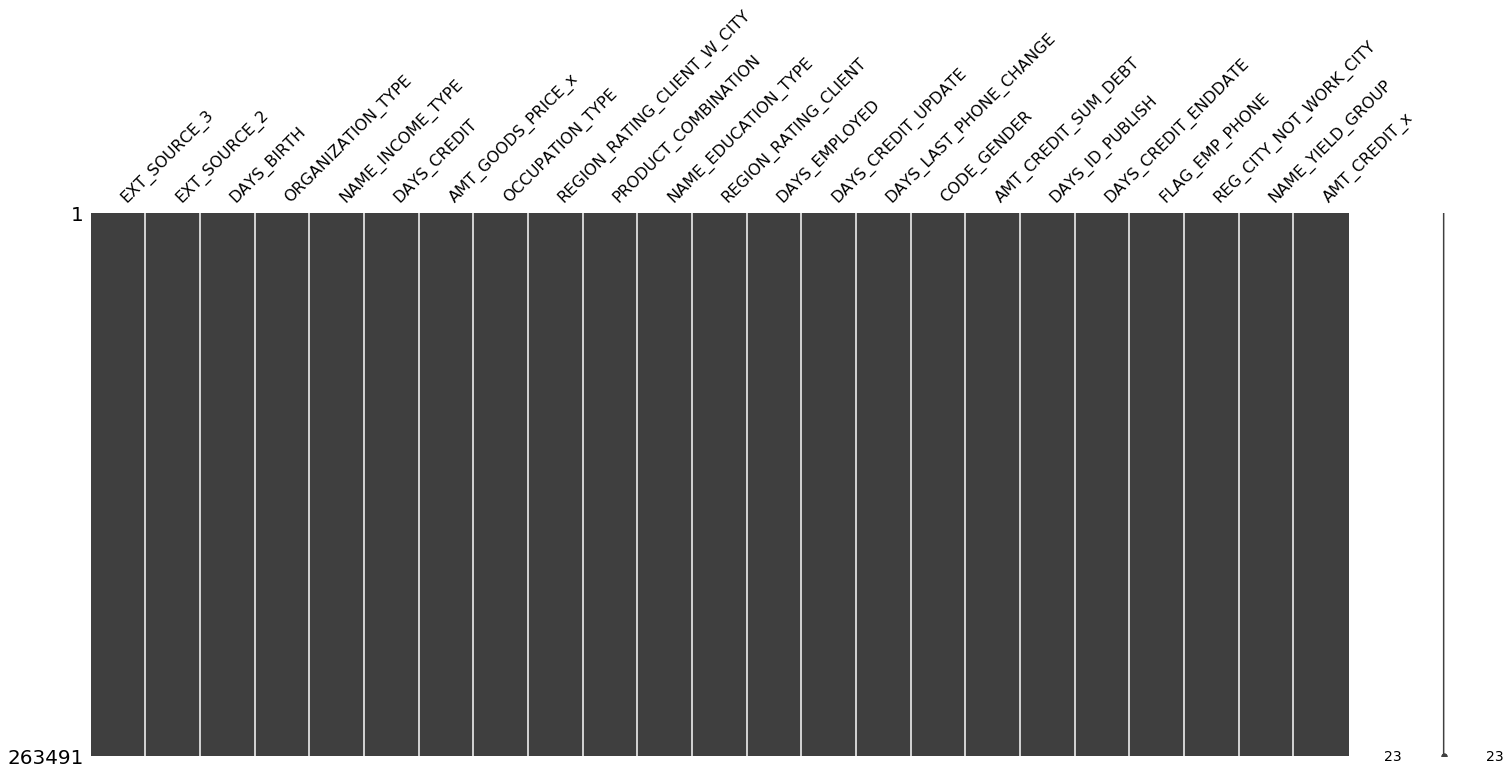

In [35]:
%matplotlib inline
msno.matrix(df_new)


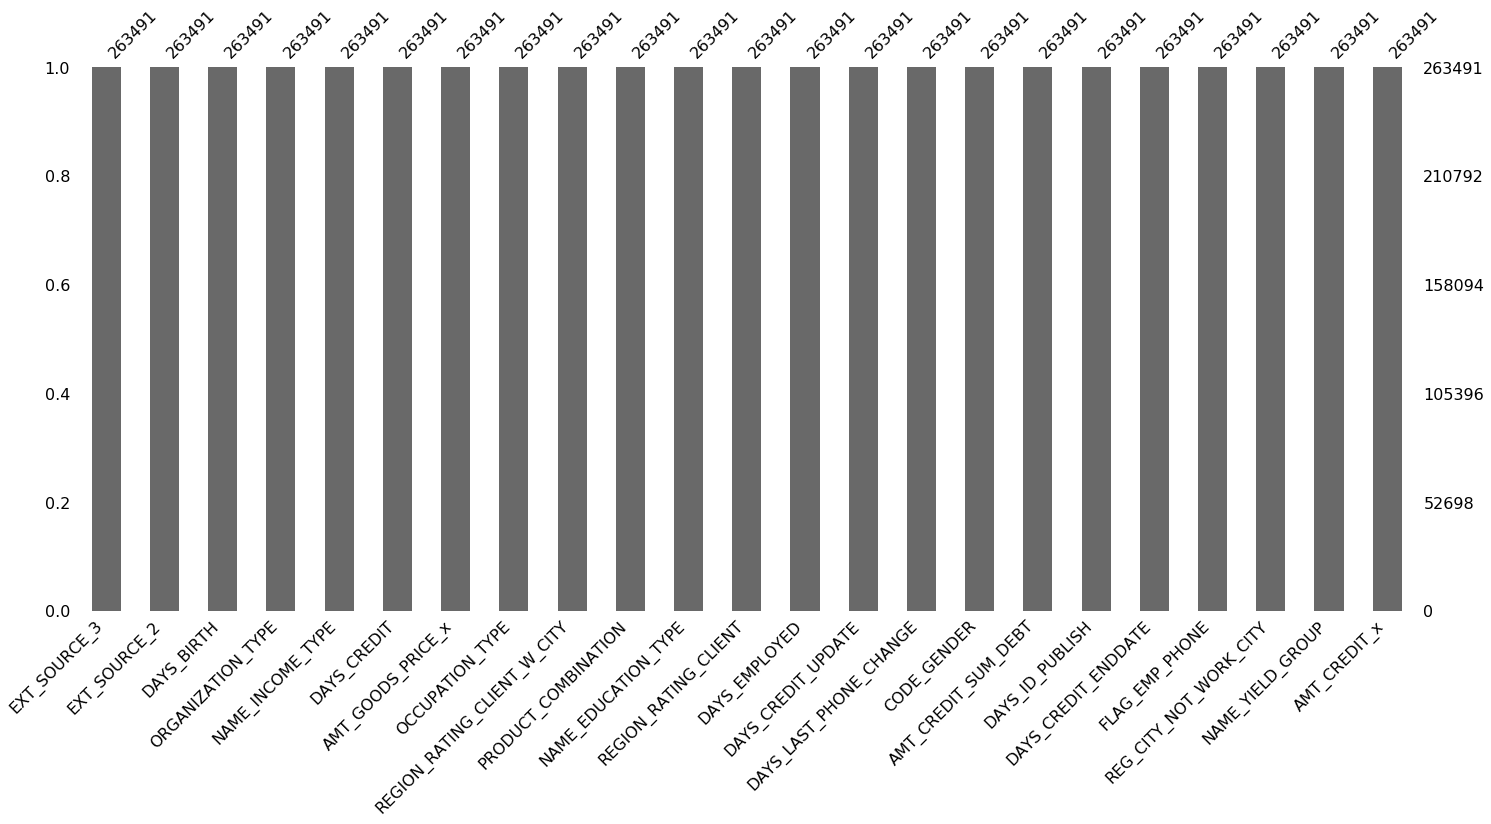

In [36]:
msno.bar(df_new)

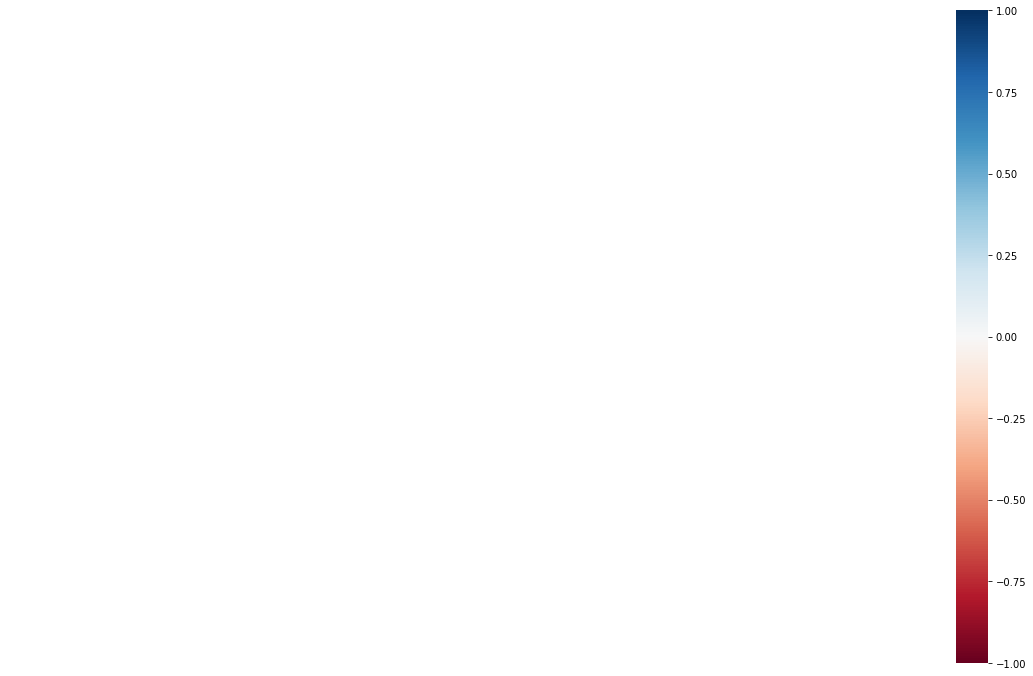

In [39]:
msno.heatmap(df_new)

In [40]:
df_new.shape

(263491, 23)

In [42]:
df_id=final_frame[['SK_ID_CURR']]
df_target=final_frame[['TARGET']]

In [46]:
df_final=pd.concat([df_id,df_target ,df_new],axis=1)

In [47]:
df_final.head(2)

,SK_ID_CURR,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_BIRTH,ORGANIZATION_TYPE,NAME_INCOME_TYPE,DAYS_CREDIT,AMT_GOODS_PRICE_x,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,PRODUCT_COMBINATION,NAME_EDUCATION_TYPE,REGION_RATING_CLIENT,DAYS_EMPLOYED,DAYS_CREDIT_UPDATE,DAYS_LAST_PHONE_CHANGE,CODE_GENDER,AMT_CREDIT_SUM_DEBT,DAYS_ID_PUBLISH,DAYS_CREDIT_ENDDATE,FLAG_EMP_PHONE,REG_CITY_NOT_WORK_CITY,NAME_YIELD_GROUP,AMT_CREDIT_x
0,100002,1,0.139376,0.262949,-9461,Business Entity Type 3,Working,-1125,351000.0,Laborers,2,POS other with interest,Secondary / secondary special,2,-637,-1038,-1134.0,M,0.0,-2120,-1038.0,1,0,low_normal,406597.5
1,100003,0,0.370650,0.622246,-16765,School,State servant,-2586,1129500.0,Core staff,1,Cash X-Sell: low,Higher education,1,-1188,-2131,-828.0,F,0.0,-291,-2434.0,1,0,low_normal,1293502.5


In [48]:
df_final.shape

(263491, 25)

In [49]:
df_final.TARGET.value_counts()

0    243123
1     20368
Name: TARGET, dtype: int64

In [52]:
from sklearn.utils import resample

df_train_majority = df_final[df_final.TARGET==0]
df_train_minority = df_final[df_final.TARGET==1]
 
# Upsample minority class
df_train_final_minority_upsampled = resample(df_train_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=243123,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
df_train_final = pd.concat([df_train_majority, df_train_final_minority_upsampled])
del df_train_majority
del df_train_final_minority_upsampled
del df_train_minority
# Display new class counts
df_train_final.TARGET.value_counts()

1    243123
0    243123
Name: TARGET, dtype: int64

In [53]:
df_train_final.shape

(486246, 25)

## NOTE: IV remains same after resampling

In [54]:
HomeCreditRisk_Data=df_train_final.to_csv('Home_credit_risk_train_final.csv',index=True)

In [63]:
ert = list(df_new.columns)

In [70]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [72]:
nf = df_final._get_numeric_data() #drop non-numeric cols
nf.head()

,SK_ID_CURR,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_BIRTH,DAYS_CREDIT,AMT_GOODS_PRICE_x,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_EMPLOYED,DAYS_CREDIT_UPDATE,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT_SUM_DEBT,DAYS_ID_PUBLISH,DAYS_CREDIT_ENDDATE,FLAG_EMP_PHONE,REG_CITY_NOT_WORK_CITY,AMT_CREDIT_x
0,100002,1,0.139376,0.262949,-9461,-1125,351000.0,2,2,-637,-1038,-1134.0,0.0,-2120,-1038.0,1,0,406597.5
1,100003,0,0.370650,0.622246,-16765,-2586,1129500.0,1,1,-1188,-2131,-828.0,0.0,-291,-2434.0,1,0,1293502.5
2,100004,0,0.729567,0.555912,-19046,-1326,135000.0,2,2,-225,-682,-815.0,0.0,-2531,-595.0,1,0,135000.0
3,100007,0,0.370650,0.322738,-19932,-1149,513000.0,2,2,-3038,-783,-1106.0,0.0,-3458,-783.0,1,1,513000.0
4,100008,0,0.621226,0.354225,-16941,-1097,454500.0,2,2,-1588,-1027,-2536.0,0.0,-477,-853.0,1,0,490495.5


In [77]:
df_final.columns

Index(['SK_ID_CURR', 'TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'DAYS_CREDIT', 'AMT_GOODS_PRICE_x', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT_W_CITY', 'PRODUCT_COMBINATION', 'NAME_EDUCATION_TYPE', 'REGION_RATING_CLIENT', 'DAYS_EMPLOYED', 'DAYS_CREDIT_UPDATE',
       'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER', 'AMT_CREDIT_SUM_DEBT', 'DAYS_ID_PUBLISH', 'DAYS_CREDIT_ENDDATE', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_WORK_CITY', 'NAME_YIELD_GROUP', 'AMT_CREDIT_x'],
      dtype='object')

### Chi-square test on categorical column 

In [78]:
 categorical = df_final.select_dtypes(include=['object']) 

In [84]:
 list(categorical.columns)

['ORGANIZATION_TYPE',
 'NAME_INCOME_TYPE',
 'OCCUPATION_TYPE',
 'PRODUCT_COMBINATION',
 'NAME_EDUCATION_TYPE',
 'CODE_GENDER',
 'NAME_YIELD_GROUP']

In [85]:
from scipy.stats import chi2_contingency


categorical_columns=list(categorical.columns)
chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(df_final["TARGET"], df_final[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

                Column              Hypothesis
0    ORGANIZATION_TYPE  Reject Null Hypothesis
1     NAME_INCOME_TYPE  Reject Null Hypothesis
2      OCCUPATION_TYPE  Reject Null Hypothesis
3  PRODUCT_COMBINATION  Reject Null Hypothesis
4  NAME_EDUCATION_TYPE  Reject Null Hypothesis
5          CODE_GENDER  Reject Null Hypothesis
6     NAME_YIELD_GROUP  Reject Null Hypothesis


In [87]:
df_final.count(axis = 1)

0         25
1         25
2         25
3         25
4         25
          ..
263486    25
263487    25
263488    25
263489    25
263490    25
Length: 263491, dtype: int64

In [90]:
list(df_final.columns)

['SK_ID_CURR',
 'TARGET',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_BIRTH',
 'ORGANIZATION_TYPE',
 'NAME_INCOME_TYPE',
 'DAYS_CREDIT',
 'AMT_GOODS_PRICE_x',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT_W_CITY',
 'PRODUCT_COMBINATION',
 'NAME_EDUCATION_TYPE',
 'REGION_RATING_CLIENT',
 'DAYS_EMPLOYED',
 'DAYS_CREDIT_UPDATE',
 'DAYS_LAST_PHONE_CHANGE',
 'CODE_GENDER',
 'AMT_CREDIT_SUM_DEBT',
 'DAYS_ID_PUBLISH',
 'DAYS_CREDIT_ENDDATE',
 'FLAG_EMP_PHONE',
 'REG_CITY_NOT_WORK_CITY',
 'NAME_YIELD_GROUP',
 'AMT_CREDIT_x']

In [91]:
credit_df_final =df_final.to_csv('credit_df_final.csv',index=True)

VIF

In [ ]:
final_frame.to_csv('AIF_Final_File.csv',index=True)

In [3]:
vif = pd.read_csv("D:\Desktop\AIF_Data\created_data\AIF_Final_File.csv")

In [17]:
vif.column

Index(['Unnamed: 0', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'FLAG_WORK_PHONE',
       ...
       'NAME_TYPE_SUITE_y', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'NAME_CONTRACT_STATUS'],
      dtype='object', length=169)

In [10]:
inp_df = vif[['SK_ID_CURR',
'TARGET',
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'NAME_INCOME_TYPE',
'NAME_EDUCATION_TYPE',
'NAME_HOUSING_TYPE',
'REGION_POPULATION_RELATIVE',
'DAYS_BIRTH',
'DAYS_EMPLOYED',
'FLAG_CONT_MOBILE',
'CNT_FAM_MEMBERS',
'REGION_RATING_CLIENT',
'REGION_RATING_CLIENT_W_CITY',
'ORGANIZATION_TYPE',
'DEF_60_CNT_SOCIAL_CIRCLE',
'DAYS_LAST_PHONE_CHANGE',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'SK_ID_CURR',
'CREDIT_ACTIVE',
'DAYS_CREDIT',
'CNT_CREDIT_PROLONG',
'AMT_CREDIT_SUM_DEBT',
'AMT_CREDIT_SUM_OVERDUE',
'CREDIT_TYPE',
'DAYS_CREDIT_UPDATE',
'STATUS',
'AMT_CREDIT_LIMIT_ACTUAL',
'AMT_PAYMENT_TOTAL_CURRENT',
'AMT_TOTAL_RECEIVABLE',
'NAME_CONTRACT_STATUS',
'SK_ID_CURR',
'AMT_APPLICATION',
'NAME_CASH_LOAN_PURPOSE',
'NAME_CONTRACT_STATUS',
'DAYS_DECISION',
'NAME_PAYMENT_TYPE',
'CODE_REJECT_REASON',
'NAME_CLIENT_TYPE',
'NAME_GOODS_CATEGORY',
'NAME_PORTFOLIO',
'NFLAG_INSURED_ON_APPROVAL',
'NUM_INSTALMENT_VERSION',
'NUM_INSTALMENT_NUMBER',
'DAYS_INSTALMENT',         
'DAYS_ENTRY_PAYMENT']]

In [16]:
nf2 = inp_df._get_numeric_data() #drop non-numeric cols
nf2.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,...,AMT_PAYMENT_TOTAL_CURRENT,AMT_TOTAL_RECEIVABLE,SK_ID_CURR,AMT_APPLICATION,DAYS_DECISION,NFLAG_INSURED_ON_APPROVAL,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT
0,100002,1,0,202500.0,0.018801,-9461,-637,1,1.0,2,...,6750.0,93706.29,100002,179055.0,-606.0,0.0,1.0,16.0,-115.0,-133.0
1,100003,0,0,270000.0,0.003541,-16765,-1188,1,2.0,1,...,6750.0,93706.29,100003,900000.0,-746.0,1.0,1.0,2.0,-686.0,-690.0
2,100004,0,0,67500.0,0.010032,-19046,-225,1,1.0,2,...,6750.0,93706.29,100004,24282.0,-815.0,0.0,1.0,2.0,-754.0,-763.0
3,100007,0,0,121500.0,0.028663,-19932,-3038,1,1.0,2,...,6750.0,93706.29,100007,180000.0,-865.0,0.0,1.0,4.0,-2236.0,-2234.0
4,100008,0,0,99000.0,0.035792,-16941,-1588,1,2.0,2,...,6750.0,93706.29,100008,162598.5,-370.0,0.0,1.0,5.0,-2179.0,-2183.0


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  

# the independent variables set 
X = nf2 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                        feature          VIF
0                    SK_ID_CURR          inf
1                        TARGET     1.102461
2                  CNT_CHILDREN     6.180544
3              AMT_INCOME_TOTAL     1.495188
4    REGION_POPULATION_RELATIVE     4.498707
5                    DAYS_BIRTH    26.607988
6                 DAYS_EMPLOYED     1.975680
7              FLAG_CONT_MOBILE    77.587077
8               CNT_FAM_MEMBERS    29.396397
9          REGION_RATING_CLIENT   184.063765
10  REGION_RATING_CLIENT_W_CITY   184.647947
11     DEF_60_CNT_SOCIAL_CIRCLE     1.078117
12       DAYS_LAST_PHONE_CHANGE     2.660274
13    AMT_REQ_CREDIT_BUREAU_MON     1.106044
14    AMT_REQ_CREDIT_BUREAU_QRT     1.121335
15                   SK_ID_CURR          inf
16                  DAYS_CREDIT     6.312609
17           CNT_CREDIT_PROLONG     1.003864
18          AMT_CREDIT_SUM_DEBT     1.038025
19       AMT_CREDIT_SUM_OVERDUE     1.000262
20           DAYS_CREDIT_UPDATE     3.408226
21      AM

In [26]:
 categorical = inp_df.select_dtypes(include=['object'])  

In [27]:
vif_cat.columns

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE',
       'CREDIT_ACTIVE', 'CREDIT_TYPE', 'STATUS', 'NAME_CONTRACT_STATUS',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO'],
      dtype='object')